# Loading libraries and functions

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, 'C:/Users/Alicja/Desktop/Data Science/_functions_')

from My_functions_EDA import *
from fx_MLRegression import *
from fx_PCA import *
from fx_Pipeline_Regression import*

# Loading Net Migration

In [2]:
df1 = pd.read_csv('../Datasets/UN_Net_Migration_Est.csv', skiprows=16, encoding= 'ISO-8859-1')
df1.head(2)

Index    Variant Region, subregion, country or area * Notes  Country code  \
0      1  Estimates                                WORLD   NaN           900   
1      2  Estimates                UN development groups     a          1803   

              Type  Parent code 1950-1955 1955-1960 1960-1965  ... 1970-1975  \
0            World            0         0         0         0  ...         0   
1  Label/Separator          900       ...       ...       ...  ...       ...   

  1975-1980 1980-1985 1985-1990 1990-1995 1995-2000 2000-2005 2005-2010  \
0         0         0         0         0         0         0         0   
1       ...       ...       ...       ...       ...       ...       ...   

  2010-2015 2015-2020  
0         0         0  
1       ...       ...  

[2 rows x 21 columns]

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Index                                 255 non-null    int64 
 1   Variant                               255 non-null    object
 2   Region, subregion, country or area *  255 non-null    object
 3   Notes                                 58 non-null     object
 4   Country code                          255 non-null    int64 
 5   Type                                  255 non-null    object
 6   Parent code                           255 non-null    int64 
 7   1950-1955                             255 non-null    object
 8   1955-1960                             255 non-null    object
 9   1960-1965                             255 non-null    object
 10  1965-1970                             255 non-null    object
 11  1970-1975                       

In [4]:
df1.drop(['Index', 'Variant', 'Notes', 'Country code', 'Parent code', '1950-1955', '1955-1960',
       '1960-1965', '1965-1970', '1970-1975', '1975-1980', '1980-1985',
       '1985-1990', '1990-1995', '1995-2000','2015-2020'], axis=1, inplace=True)

In [5]:
df1.Type.value_counts()

Country/Area         201
Subregion             20
SDG region             8
Income Group           6
Region                 6
Development Group      5
Label/Separator        4
Special other          2
SDG subregion          2
World                  1
Name: Type, dtype: int64

In [6]:
df1 = df1[df1['Type'] == 'Country/Area']

In [7]:
df1.rename(columns={'Region, subregion, country or area *': 'Country Name', '2000-2005': '2005', '2005-2010': '2010', '2010-2015': '2015'}, inplace=True)
df1.head(2)

Country Name          Type  2005  2010  2015
26      Burundi  Country/Area  -0.7   0.7  -1.5
27      Comoros  Country/Area  -3.5  -3.1  -2.7

In [8]:
df1.drop(['Type'], axis=1, inplace=True)
df1.head(2)

Country Name  2005  2010  2015
26      Burundi  -0.7   0.7  -1.5
27      Comoros  -3.5  -3.1  -2.7

In [9]:
df1 = df1.sort_values(by ='Country Name')

In [10]:
df1['Country Name'].nunique()

201

In [11]:
df1['Country Name'].unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, Taiwan Province of China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Dem. People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',


In [12]:
df1['Country Name'] = df1['Country Name'].replace('Bolivia (Plurinational State of)', 'Bolivia')
df1['Country Name'] = df1['Country Name'].replace('China, Hong Kong SAR', 'Hong Kong S.A.R. of China')
df1['Country Name'] = df1['Country Name'].replace('China, Taiwan Province of China', 'Taiwan Province of China')
df1['Country Name'] = df1['Country Name'].replace('Congo', 'Congo (Brazzaville)')
df1['Country Name'] = df1['Country Name'].replace('Democratic Republic of the Congo', 'Congo (Kinshasa)')
df1['Country Name'] = df1['Country Name'].replace('Czechia', 'Czech Republic')
df1['Country Name'] = df1['Country Name'].replace('Iran (Islamic Republic of)', 'Iran')
df1['Country Name'] = df1['Country Name'].replace("Côte d'Ivoire", 'Ivory Coast')
df1['Country Name'] = df1['Country Name'].replace("Lao People's Democratic Republic", 'Laos')
df1['Country Name'] = df1['Country Name'].replace('North Macedonia', 'Macedonia')
df1['Country Name'] = df1['Country Name'].replace('Republic of Moldova', 'Moldova')
df1['Country Name'] = df1['Country Name'].replace('State of Palestine', 'Palestinian Territories')
df1['Country Name'] = df1['Country Name'].replace('Russian Federation', 'Russia')
df1['Country Name'] = df1['Country Name'].replace('Syrian Arab Republic', 'Syria')
df1['Country Name'] = df1['Country Name'].replace('United States of America', 'United States')
df1['Country Name'] = df1['Country Name'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
df1['Country Name'] = df1['Country Name'].replace('Viet Nam', 'Vietnam')
df1['Country Name'] = df1['Country Name'].replace('Republic of Korea', 'South Korea')
df1['Country Name'] = df1['Country Name'].replace('Eswatini', 'Swaziland')
df1['Country Name'] = df1['Country Name'].replace('United Republic of Tanzania', 'Tanzania')

    Let's re-arrange the dataframe!

In [13]:
df1_melt = pd.melt(df1,
                   id_vars=['Country Name'],
                   value_vars=['2005','2010','2015'],
                   var_name='Year',value_name='Net Migration')

In [14]:
df1_melt.head()

Country Name  Year Net Migration
0          Afghanistan  2005           6.4
1              Albania  2005         -11.4
2              Algeria  2005          -1.3
3               Angola  2005           2.9
4  Antigua and Barbuda  2005           0.6

In [15]:
df1_melt ['coun+year'] = df1_melt['Country Name'] + df1_melt['Year']
df1_melt.head(2)

Country Name  Year Net Migration        coun+year
0  Afghanistan  2005           6.4  Afghanistan2005
1      Albania  2005         -11.4      Albania2005

In [16]:
df1_melt['Net Migration'] = df1_melt['Net Migration'].astype('float64')

# Loading Migrant stock (%)

In [17]:
df2 = pd.read_csv('../Datasets/API_SM.POP.TOTL.ZS_DS2_en_csv_v.csv', skiprows=4)

# Drop the columns with all info missing ()
df2.dropna(how='all', axis=1, inplace=True)
df2.head(2)

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   

                                  Indicator Name  Indicator Code       1990  \
0  International migrant stock (% of population)  SM.POP.TOTL.ZS  23.241295   
1  International migrant stock (% of population)  SM.POP.TOTL.ZS   2.861623   

        1995       2000       2005       2010       2015  
0  27.729502  33.133021  32.529916  33.787415  34.762102  
1   2.437572   1.797260   1.570605   1.458032   1.734768

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1990            258 non-null    float64
 5   1995            258 non-null    float64
 6   2000            258 non-null    float64
 7   2005            259 non-null    float64
 8   2010            263 non-null    float64
 9   2015            262 non-null    float64
dtypes: float64(6), object(4)
memory usage: 20.9+ KB


In [19]:
df2['Country Name'].nunique()

266

In [20]:
df2['Country Name'].unique().tolist()

['Aruba',
 'Africa Eastern and Southern',
 'Afghanistan',
 'Africa Western and Central',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Curacao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high 

In [21]:
df2['Country Name'] = df2['Country Name'].replace('Congo, Rep.', 'Congo (Brazzaville)')
df2['Country Name'] = df2['Country Name'].replace('Congo, Dem. Rep.', 'Congo (Kinshasa)')
df2['Country Name'] = df2['Country Name'].replace('Egypt, Arab Rep.', 'Egypt')
df2['Country Name'] = df2['Country Name'].replace('Hong Kong SAR, China','Hong Kong S.A.R. of China')
df2['Country Name'] = df2['Country Name'].replace('Iran, Islamic Rep.', 'Iran')
df2['Country Name'] = df2['Country Name'].replace("Cote d'Ivoire", 'Ivory Coast')
df2['Country Name'] = df2['Country Name'].replace('Kyrgyz Republic', 'Kyrgyzstan')
df2['Country Name'] = df2['Country Name'].replace('Lao PDR', 'Laos')
df2['Country Name'] = df2['Country Name'].replace('North Macedonia', 'Macedonia')
df2['Country Name'] = df2['Country Name'].replace('Russian Federation', 'Russia')
df2['Country Name'] = df2['Country Name'].replace('Slovak Republic', 'Slovakia')
df2['Country Name'] = df2['Country Name'].replace('Korea, Rep.', 'South Korea')
df2['Country Name'] = df2['Country Name'].replace('Syrian Arab Republic', 'Syria')
df2['Country Name'] = df2['Country Name'].replace('Venezuela, RB', 'Venezuela')
df2['Country Name'] = df2['Country Name'].replace('Yemen, Rep.', 'Yemen')

    Let's re-arrange the dataframe!

In [22]:
df_melt = pd.melt(df2,
                   id_vars=['Country Name'],
                   value_vars=['2005','2010','2015'],
                   var_name='Year',value_name='Migration_stock%')

In [23]:
df_melt.head(2)

Country Name  Year  Migration_stock%
0                        Aruba  2005         32.529916
1  Africa Eastern and Southern  2005          1.570605

In [24]:
df_melt.Year.unique()

array(['2005', '2010', '2015'], dtype=object)

In [25]:
# Creating again the column country+year
df_melt ['coun+year'] = df_melt['Country Name'] + df_melt['Year']
df_melt.head()

Country Name  Year  Migration_stock%  \
0                        Aruba  2005         32.529916   
1  Africa Eastern and Southern  2005          1.570605   
2                  Afghanistan  2005          0.357788   
3   Africa Western and Central  2005          2.152178   
4                       Angola  2005          0.342373   

                         coun+year  
0                        Aruba2005  
1  Africa Eastern and Southern2005  
2                  Afghanistan2005  
3   Africa Western and Central2005  
4                       Angola2005

# Loading World Happines Report

In [26]:
df = pd.read_csv('../Datasets/WHP2018_WET.csv')
df.head()

country  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         49.209663                      0.718114    0.181819   
1                         49.624432                      0.678896    0.203614   
2                         50.008961                      0.600127    0.137630   
3                         50.367298                      0.495901    0.175329   
4                         50.709263                      0.530935    0.247159   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.881686         0.517637         0.258195   
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.612072           -1.929690         -1.655084   
1                           0.611545           -2.044093         -1.635025   
2                           0.299357           -1.991810         -1.617176   
3                           0.307386           -1.919018         -1.616221   
4                           0.435440           -1.842996         -1.404078   

   Standard deviation of ladder by country-year  \
0                                      1.774662   
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.476600   
1                                           0.391362   
2                                           0.394803   
3                                           0.465942   
4                                           0.475367   

   GINI index (World Bank estimate)  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

   GINI index (World Bank estimate), average 2000-15  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   gini of household income reported in Gallup, by wp5-year  
0                                                NaN         
1                                           0.441906         
2                                           0.327318         
3                                           0.336764         
4                                           0.344540

In [27]:
df.year.unique() #2005,2010,2015

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007,
       2006, 2005], dtype=int64)

In [28]:
df.year.value_counts()

2011    146
2014    145
2015    143
2012    142
2016    142
2017    141
2013    137
2010    124
2009    114
2008    110
2007    102
2006     89
2005     27
Name: year, dtype: int64

In [29]:
df[df['year'] == 2005].country.unique()  #consider removing or moving below

array(['Australia', 'Belgium', 'Brazil', 'Canada', 'Czech Republic',
       'Denmark', 'Egypt', 'France', 'Germany', 'Greece', 'Hungary',
       'Iran', 'Italy', 'Japan', 'Jordan', 'Lebanon', 'Mexico',
       'Netherlands', 'Pakistan', 'Poland', 'Romania', 'Saudi Arabia',
       'Spain', 'Sweden', 'Turkey', 'United Kingdom', 'Venezuela'],
      dtype=object)

In [30]:
df[df['year'] == 2006].country.unique()  #consider removing or moving below

array(['Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Chad', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Cuba', 'Cyprus', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Ghana',
       'Guatemala', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Jamaica', 'Kazakhstan',
       'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
       'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Moldova',
       'Mozambique', 'Nepal', 'New Zealand', 'Nicaragua', 'Niger',
       'Nigeria', 'Norway', 'Palestinian Territories', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Portugal', 'Russia', 'Rwanda',
       'Senegal', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Sri Lanka', 'Switzerland',
       'Taiwan Pr

    Let's create a new column, containing country + year. We're going to use it for the join

In [31]:
df['coun+year'] = df['country'] + df['year'].astype(str)

In [32]:
df['country'].nunique()

164

## Countries with data for 2005, 2010, 2015

In [33]:
country_05 = df[df.year.isin([2005])].groupby(['country'])['year'].count().sort_values(ascending=False)
country_05 = country_05.reset_index()
country_2005 = country_05['country'].tolist()
print("Number of countries which had survey conducted in 2005 is:", len(country_2005))

Number of countries which had survey conducted in 2005 is: 27


In [34]:
country_10 = df[df.year.isin([2010])].groupby(['country'])['year'].count().sort_values(ascending=False)
country_10 = country_10.reset_index()
country_2010 = country_10['country'].tolist()
print("Number of countries which had survey conducted in 2010 is:", len(country_2010))

Number of countries which had survey conducted in 2010 is: 124


In [35]:
country_15 = df[df.year.isin([2015])].groupby(['country'])['year'].count().sort_values(ascending=False)
country_15 = country_15.reset_index()
country_2015 = country_15['country'].tolist()
print("Number of countries which had survey conducted in 2010 is:", len(country_2015))

Number of countries which had survey conducted in 2010 is: 143


    For net migration and for migration stock percentage I only have data for 2005, 20010 and 2015. As can be seen above there are not many countries that had the World Happines Survey conducted in those years and the number of countries is lower the the lower the year. In order to make my dataset larger I decided to use the following years data for the countries that did not have the survey conducted in the mentioned year (e.g. if a country did not have the survey conducted in 2005 I will use the data from 2006 and if the country did not have the survey conducted in either 2005 or 2006 I will use data from 2007). I understand that it would make more sense to use the data from the previous year but I do not have that data. I am also aware of the trade off I am making between balancing the data and accuracy.

## Replacig missing rows with 2006, 2011, 2016

In [36]:
df.loc[~(df.country.isin(country_2005)), 'coun+year'] = df.loc[~(df.country.isin(country_2005)), 'coun+year'].str.replace('2006', '2005')

In [37]:
df.loc[~(df.country.isin(country_2010)), 'coun+year'] = df.loc[~(df.country.isin(country_2010)), 'coun+year'].str.replace('2011', '2010')

In [38]:
df.loc[~(df.country.isin(country_2015)), 'coun+year'] = df.loc[~(df.country.isin(country_2015)), 'coun+year'].str.replace('2016', '2015')

In [39]:
country_r56 = df[df.year.isin([2005, 2006])].groupby(['country'])['year'].count().sort_values(ascending=False)
country_r56 = country_r56.reset_index()
country_rem56 = country_r56['country'].tolist()
print("Number of countries which had survey conducted in 2005 or 2006 is:", len(country_rem56), 
      "so the the number of rows increased by:", len(country_rem56) - len(country_2005))

Number of countries which had survey conducted in 2005 or 2006 is: 113 so the the number of rows increased by: 86


In [40]:
country_r1011 = df[df.year.isin([2010, 2011])].groupby(['country'])['year'].count().sort_values(ascending=False)
country_r1011 = country_r1011.reset_index()
country_rem1011 = country_r1011['country'].tolist()
print("Number of countries which had survey conducted in 2010 or 2011 is:", len(country_rem1011), 
      "so the the number of rows increased by:",len(country_rem1011) - len(country_2010))

Number of countries which had survey conducted in 2010 or 2011 is: 148 so the the number of rows increased by: 24


In [41]:
country_r1516 = df[df.year.isin([2015, 2016])].groupby(['country'])['year'].count().sort_values(ascending=False)
country_r1516 = country_r1516.reset_index()
country_rem1516 = country_r1516['country'].tolist()
print("Number of countries which had survey conducted in 2010 or 2011 is:", len(country_rem1516), 
      "so the the number of rows increased by:",len(country_rem1516) - len(country_2015))

Number of countries which had survey conducted in 2010 or 2011 is: 148 so the the number of rows increased by: 5


## Replacig missing rows with 2007, 2012, 2017

In [42]:
df.loc[~(df.country.isin(country_rem56)), 'coun+year'] = df.loc[~(df.country.isin(country_rem56)), 'coun+year'].str.replace('2007', '2005')

In [43]:
df.loc[~(df.country.isin(country_rem1011)), 'coun+year'] = df.loc[~(df.country.isin(country_rem1011)), 'coun+year'].str.replace('2012', '2010')

In [44]:
df.loc[~(df.country.isin(country_rem1516)), 'coun+year'] = df.loc[~(df.country.isin(country_rem1516)), 'coun+year'].str.replace('2017', '2015')

In [45]:
country_r567 = df[df.year.isin([2005, 2006, 2007])].groupby(['country'])['year'].count().sort_values(ascending=False)
country_r567 = country_r567.reset_index()
country_rem567 = country_r567['country'].tolist()
print("Adding data from 2007 for countries which did not have survey conducted in 2005 or 2006 increased number of rows by",
      len(country_rem567) - len(country_rem56))

Adding data from 2007 for countries which did not have survey conducted in 2005 or 2006 increased number of rows by 16


In [46]:
country_r101112 = df[df.year.isin([2010, 2011, 2012])].groupby(['country'])['year'].count().sort_values(ascending=False)
country_r101112 = country_r101112.reset_index()
country_rem101112 = country_r101112['country'].tolist()
print("Adding data from 2012 for countries which did not have survey conducted in 2010 or 2011 increased number of rows by",
      len(country_rem101112) - len(country_rem1011))

Adding data from 2012 for countries which did not have survey conducted in 2010 or 2011 increased number of rows by 8


In [47]:
country_r151617 = df[df.year.isin([2015, 2016, 2017])].groupby(['country'])['year'].count().sort_values(ascending=False)
country_r151617 = country_r151617.reset_index()
country_rem151617 = country_r151617['country'].tolist()
print("Adding data from 2017 for countries which did not have survey conducted in 2015 or 2016 increased number of rows by",
      len(country_rem151617) - len(country_rem1516))

Adding data from 2017 for countries which did not have survey conducted in 2015 or 2016 increased number of rows by 4


#    Let's join!

In [48]:
new_df = df.merge(df_melt, how= 'left', on= ['coun+year'])
new_df.head(10)

country  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   
5  Afghanistan  2013     3.572100            7.503376        0.483552   
6  Afghanistan  2014     3.130896            7.484583        0.525568   
7  Afghanistan  2015     3.982855            7.466215        0.528597   
8  Afghanistan  2016     4.220169            7.461401        0.559072   
9  Afghanistan  2017     2.661718            7.460144        0.490880   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         49.209663                      0.718114    0.181819   
1                         49.624432                      0.678896    0.203614   
2                         50.008961                      0.600127    0.137630   
3                         50.367298                      0.495901    0.175329   
4                         50.709263                      0.530935    0.247159   
5                         51.042980                      0.577955    0.074735   
6                         51.370525                      0.508514    0.118579   
7                         51.693527                      0.388928    0.094686   
8                         52.016529                      0.522566    0.057072   
9                         52.339527                      0.427011   -0.106340   

   Perceptions of corruption  Positive affect  ...  Delivery Quality  \
0                   0.881686         0.517637  ...         -1.655084   
1                   0.850035         0.583926  ...         -1.635025   
2                   0.706766         0.618265  ...         -1.617176   
3                   0.731109         0.611387  ...         -1.616221   
4                   0.775620         0.710385  ...         -1.404078   
5                   0.823204         0.620585  ...         -1.403036   
6                   0.871242         0.531691  ...         -1.312503   
7                   0.880638         0.553553  ...         -1.291594   
8                   0.793246         0.564953  ...         -1.432548   
9                   0.954393         0.496349  ...               NaN   

   Standard deviation of ladder by country-year  \
0                                      1.774662   
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   
5                                      1.223690   
6                                      1.395396   
7                                      2.160618   
8                                      1.796219   
9                                      1.454051   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.476600   
1                                           0.391362   
2                                           0.394803   
3                                           0.465942   
4                                           0.475367   
5                                           0.342569   
6                                           0.445686   
7                                           0.542480   
8                                           0.425627   
9                                           0.546283   

   GINI index (World Bank estimate)  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   
5                               NaN   
6                               NaN   
7                          

In [49]:
new_df = new_df.merge(df1_melt, how= 'left', on= ['coun+year'])
new_df.head(10)

country  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   
5  Afghanistan  2013     3.572100            7.503376        0.483552   
6  Afghanistan  2014     3.130896            7.484583        0.525568   
7  Afghanistan  2015     3.982855            7.466215        0.528597   
8  Afghanistan  2016     4.220169            7.461401        0.559072   
9  Afghanistan  2017     2.661718            7.460144        0.490880   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         49.209663                      0.718114    0.181819   
1                         49.624432                      0.678896    0.203614   
2                         50.008961                      0.600127    0.137630   
3                         50.367298                      0.495901    0.175329   
4                         50.709263                      0.530935    0.247159   
5                         51.042980                      0.577955    0.074735   
6                         51.370525                      0.508514    0.118579   
7                         51.693527                      0.388928    0.094686   
8                         52.016529                      0.522566    0.057072   
9                         52.339527                      0.427011   -0.106340   

   Perceptions of corruption  Positive affect  ...  \
0                   0.881686         0.517637  ...   
1                   0.850035         0.583926  ...   
2                   0.706766         0.618265  ...   
3                   0.731109         0.611387  ...   
4                   0.775620         0.710385  ...   
5                   0.823204         0.620585  ...   
6                   0.871242         0.531691  ...   
7                   0.880638         0.553553  ...   
8                   0.793246         0.564953  ...   
9                   0.954393         0.496349  ...   

   GINI index (World Bank estimate)  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   
5                               NaN   
6                               NaN   
7                               NaN   
8                               NaN   
9                               NaN   

   GINI index (World Bank estimate), average 2000-15  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7                                                NaN   
8                                                NaN   
9                                                NaN   

   gini of household income reported in Gallup, by wp5-year        coun+year  \
0                                                NaN         Afghanistan2008   
1                                           0.441906         Afghanistan2009   
2                                           0.327318         Afghanistan2010   
3                                           0.336764         Afghanistan2011   
4                                           0.344540         Afghanistan2012   
5                                           0.304368         Afghanistan2013   
6                                           0.413974         Afghanistan2014   
7                            

In [50]:
new_df = new_df[['country', 'year', 'Migration_stock%', 'Net Migration','Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year']]

In [51]:
new_df.head(5)

country  year  Migration_stock%  Net Migration  Life Ladder  \
0  Afghanistan  2008               NaN            NaN     3.723590   
1  Afghanistan  2009               NaN            NaN     4.401778   
2  Afghanistan  2010          0.365658           -7.6     4.758381   
3  Afghanistan  2011               NaN            NaN     3.831719   
4  Afghanistan  2012               NaN            NaN     3.782938   

   Log GDP per capita  Social support  Healthy life expectancy at birth  \
0            7.168690        0.450662                         49.209663   
1            7.333790        0.552308                         49.624432   
2            7.386629        0.539075                         50.008961   
3            7.415019        0.521104                         50.367298   
4            7.517126        0.520637                         50.709263   

   Freedom to make life choices  Generosity  ...  Positive affect  \
0                      0.718114    0.181819  ...         0.517637   
1                      0.678896    0.203614  ...         0.583926   
2                      0.600127    0.137630  ...         0.618265   
3                      0.495901    0.175329  ...         0.611387   
4                      0.530935    0.247159  ...         0.710385   

   Negative affect  Confidence in national government  Democratic Quality  \
0         0.258195                           0.612072           -1.929690   
1         0.237092                           0.611545           -2.044093   
2         0.275324                           0.299357           -1.991810   
3         0.267175                           0.307386           -1.919018   
4         0.267919                           0.435440           -1.842996   

   Delivery Quality  Standard deviation of ladder by country-year  \
0         -1.655084                                      1.774662   
1         -1.635025                                      1.722688   
2         -1.617176                                      1.878622   
3         -1.616221                                      1.785360   
4         -1.404078                                      1.798283   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.476600   
1                                           0.391362   
2                                           0.394803   
3                                           0.465942   
4                                           0.475367   

   GINI index (World Bank estimate)  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

   GINI index (World Bank estimate), average 2000-15  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   gini of household income reported in Gallup, by wp5-year  
0                                                NaN         
1                                           0.441906         
2                                           0.327318         
3                                           0.336764         
4                                           0.344540         

[5 rows x 21 columns]

# EDA / Data Cleaning

In [52]:
new_df.isnull().sum().sort_values(ascending=False)

Migration_stock%                                            1139
Net Migration                                               1131
GINI index (World Bank estimate)                             979
gini of household income reported in Gallup, by wp5-year     357
GINI index (World Bank estimate), average 2000-15            176
Delivery Quality                                             171
Democratic Quality                                           171
Confidence in national government                            161
Perceptions of corruption                                     90
Generosity                                                    80
Freedom to make life choices                                  29
Log GDP per capita                                            27
Positive affect                                               18
Social support                                                13
Negative affect                                               12
Healthy life expectancy a

In [53]:
percentage_nullValues(new_df)

Percentage_NaN
Migration_stock%                                              72.9
Net Migration                                                 72.4
GINI index (World Bank estimate)                              62.7
gini of household income reported in Gallup, by...            22.9
GINI index (World Bank estimate), average 2000-15             11.3
Delivery Quality                                              10.9
Democratic Quality                                            10.9
Confidence in national government                             10.3
Perceptions of corruption                                      5.8
Generosity                                                     5.1
Freedom to make life choices                                   1.9
Log GDP per capita                                             1.7
Positive affect                                                1.2
Negative affect                                                0.8
Social support                                                 0.8
Healthy life expectancy at birth                               0.6
year                                                           0.0
Standard deviation of ladder by country-year                   0.0
Standard deviation/Mean of ladder by country-year              0.0
Life Ladder                                                    0.0
country                                                        0.0

## Dropping "GINI index (World Bank estimate)"

In [54]:
new_df.drop(['GINI index (World Bank estimate)'], axis=1, inplace=True)

In [55]:
print('We have', len(new_df.columns), 'columns')

We have 20 columns


## Filling NaNs with data found on the World Bank Data website

In [56]:
new_df.loc[new_df['country'] == 'Kosovo', ['GINI index (World Bank estimate), average 2000-15']] = 0.2925
new_df.loc[new_df['country'] == 'Malta', ['GINI index (World Bank estimate), average 2000-15']] = 0.2911
new_df.loc[new_df['country'] == 'United Arab Emirates', ['GINI index (World Bank estimate), average 2000-15']] = 0.325
new_df.loc[new_df['country'] == 'Somalia', ['GINI index (World Bank estimate), average 2000-15']] = 0.368

## Filling NaNs with mean values per country using groupby method

In [57]:
new_df['Healthy life expectancy at birth'] = new_df.groupby(['country'], sort=False)['Healthy life expectancy at birth'].apply(lambda x: x.fillna(x.mean()))

In [58]:
new_df['Social support'] = new_df.groupby(['country'], sort=False)['Social support'].apply(lambda x: x.fillna(x.mean()))

In [59]:
new_df['Negative affect'] = new_df.groupby(['country'], sort=False)['Negative affect'].apply(lambda x: x.fillna(x.mean()))

In [60]:
new_df['Positive affect'] = new_df.groupby(['country'], sort=False)['Positive affect'].apply(lambda x: x.fillna(x.mean()))

In [61]:
new_df['Log GDP per capita'] = new_df.groupby(['country'], sort=False)['Log GDP per capita'].apply(lambda x: x.fillna(x.mean()))

In [62]:
new_df['Freedom to make life choices'] = new_df.groupby(['country'], sort=False)['Freedom to make life choices'].apply(lambda x: x.fillna(x.mean()))

In [63]:
new_df['Generosity'] = new_df.groupby(['country'], sort=False)['Generosity'].apply(lambda x: x.fillna(x.mean()))

In [64]:
new_df['Perceptions of corruption'] = new_df.groupby(['country'], sort=False)['Perceptions of corruption'].apply(lambda x: x.fillna(x.mean()))

In [65]:
new_df['GINI index (World Bank estimate), average 2000-15'] = new_df.groupby(['country'], sort=False)['GINI index (World Bank estimate), average 2000-15'].apply(lambda x: x.fillna(x.mean()))

In [66]:
new_df['Confidence in national government'] = new_df.groupby(['country'], sort=False)['Confidence in national government'].apply(lambda x: x.fillna(x.mean()))

In [67]:
new_df['Democratic Quality'] = new_df.groupby(['country'], sort=False)['Democratic Quality'].apply(lambda x: x.fillna(x.mean()))

In [68]:
new_df['Delivery Quality'] = new_df.groupby(['country'], sort=False)['Delivery Quality'].apply(lambda x: x.fillna(x.mean()))

In [69]:
new_df['gini of household income reported in Gallup, by wp5-year'] = new_df.groupby(['country'], sort=False)['gini of household income reported in Gallup, by wp5-year'].apply(lambda x: x.fillna(x.mean()))

In [70]:
percentage_nullValues(new_df)

Percentage_NaN
Migration_stock%                                              72.9
Net Migration                                                 72.4
GINI index (World Bank estimate), average 2000-15              9.2
Confidence in national government                              4.7
Delivery Quality                                               2.0
Democratic Quality                                             2.0
Perceptions of corruption                                      1.4
Log GDP per capita                                             0.8
Generosity                                                     0.8
Healthy life expectancy at birth                               0.6
gini of household income reported in Gallup, by...             0.4
Positive affect                                                0.1
Social support                                                 0.1
Negative affect                                                0.0
year                                                           0.0
Freedom to make life choices                                   0.0
Standard deviation of ladder by country-year                   0.0
Standard deviation/Mean of ladder by country-year              0.0
Life Ladder                                                    0.0
country                                                        0.0

## Filling the rest of the NaNs with KNN

In [71]:
X = new_df.drop(['country', 'Migration_stock%', 'Net Migration'], axis=1)

In [72]:
col_ = X.columns

In [73]:
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [74]:
# fit on the dataset
imputer.fit(X)

KNNImputer()

In [75]:
# transform the dataset
Xtrans = imputer.transform(X)

In [76]:
final_df = pd.DataFrame(Xtrans)
final_df.columns = col_
final_df.head()

year  Life Ladder  Log GDP per capita  Social support  \
0  2008.0     3.723590            7.168690        0.450662   
1  2009.0     4.401778            7.333790        0.552308   
2  2010.0     4.758381            7.386629        0.539075   
3  2011.0     3.831719            7.415019        0.521104   
4  2012.0     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         49.209663                      0.718114    0.181819   
1                         49.624432                      0.678896    0.203614   
2                         50.008961                      0.600127    0.137630   
3                         50.367298                      0.495901    0.175329   
4                         50.709263                      0.530935    0.247159   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.881686         0.517637         0.258195   
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.612072           -1.929690         -1.655084   
1                           0.611545           -2.044093         -1.635025   
2                           0.299357           -1.991810         -1.617176   
3                           0.307386           -1.919018         -1.616221   
4                           0.435440           -1.842996         -1.404078   

   Standard deviation of ladder by country-year  \
0                                      1.774662   
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.476600   
1                                           0.391362   
2                                           0.394803   
3                                           0.465942   
4                                           0.475367   

   GINI index (World Bank estimate), average 2000-15  \
0                                           0.419467   
1                                           0.421000   
2                                           0.409100   
3                                           0.415117   
4                                           0.411433   

   gini of household income reported in Gallup, by wp5-year  
0                                           0.385668         
1                                           0.441906         
2                                           0.327318         
3                                           0.336764         
4                                           0.344540

In [77]:
final_df['country'] = new_df['country']
final_df['Migration_stock%'] = new_df['Migration_stock%']
final_df['Net Migration'] = new_df['Net Migration']
final_df.head()

year  Life Ladder  Log GDP per capita  Social support  \
0  2008.0     3.723590            7.168690        0.450662   
1  2009.0     4.401778            7.333790        0.552308   
2  2010.0     4.758381            7.386629        0.539075   
3  2011.0     3.831719            7.415019        0.521104   
4  2012.0     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         49.209663                      0.718114    0.181819   
1                         49.624432                      0.678896    0.203614   
2                         50.008961                      0.600127    0.137630   
3                         50.367298                      0.495901    0.175329   
4                         50.709263                      0.530935    0.247159   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.881686         0.517637         0.258195   
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.612072           -1.929690         -1.655084   
1                           0.611545           -2.044093         -1.635025   
2                           0.299357           -1.991810         -1.617176   
3                           0.307386           -1.919018         -1.616221   
4                           0.435440           -1.842996         -1.404078   

   Standard deviation of ladder by country-year  \
0                                      1.774662   
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.476600   
1                                           0.391362   
2                                           0.394803   
3                                           0.465942   
4                                           0.475367   

   GINI index (World Bank estimate), average 2000-15  \
0                                           0.419467   
1                                           0.421000   
2                                           0.409100   
3                                           0.415117   
4                                           0.411433   

   gini of household income reported in Gallup, by wp5-year      country  \
0                                           0.385668         Afghanistan   
1                                           0.441906         Afghanistan   
2                                           0.327318         Afghanistan   
3                                           0.336764         Afghanistan   
4                                           0.344540         Afghanistan   

   Migration_stock%  Net Migration  
0               NaN            NaN  
1               NaN            NaN  
2          0.365658           -7.6  
3               NaN            NaN  
4               NaN            NaN

In [78]:
percentage_nullValues(final_df)

Percentage_NaN
Migration_stock%                                              72.9
Net Migration                                                 72.4
Life Ladder                                                    0.0
country                                                        0.0
gini of household income reported in Gallup, by...             0.0
GINI index (World Bank estimate), average 2000-15              0.0
Standard deviation/Mean of ladder by country-year              0.0
Standard deviation of ladder by country-year                   0.0
Delivery Quality                                               0.0
Democratic Quality                                             0.0
year                                                           0.0
Negative affect                                                0.0
Positive affect                                                0.0
Perceptions of corruption                                      0.0
Generosity                                                     0.0
Freedom to make life choices                                   0.0
Healthy life expectancy at birth                               0.0
Social support                                                 0.0
Log GDP per capita                                             0.0
Confidence in national government                              0.0

## Dropping rows without Migration_stock%

In [79]:
final_df = final_df.dropna(subset=['Migration_stock%'])
final_df = final_df.reset_index(drop=True)
final_df.head()

year  Life Ladder  Log GDP per capita  Social support  \
0  2010.0     4.758381            7.386629        0.539075   
1  2015.0     3.982855            7.466215        0.528597   
2  2007.0     4.634252            9.077325        0.821372   
3  2010.0     5.268937            9.203026        0.733152   
4  2015.0     4.606651            9.303031        0.639356   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.008961                      0.600127    0.137630   
1                         51.693527                      0.388928    0.094686   
2                         66.576630                      0.528605   -0.016183   
3                         67.413696                      0.568958   -0.177533   
4                         68.691956                      0.703851   -0.086883   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.706766         0.618265         0.275324   
1                   0.880638         0.553553         0.339276   
2                   0.874700         0.552678         0.246335   
3                   0.726262         0.647908         0.300060   
4                   0.884793         0.688370         0.350427   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.299357           -1.991810         -1.617176   
1                           0.260557           -1.844364         -1.291594   
2                           0.300681           -0.045108         -0.420024   
3                           0.409726           -0.033831         -0.246433   
4                           0.506978            0.251629         -0.152544   

   Standard deviation of ladder by country-year  \
0                                      1.878622   
1                                      2.160618   
2                                      1.764947   
3                                      1.862201   
4                                      2.729001   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.394803   
1                                           0.542480   
2                                           0.380848   
3                                           0.353430   
4                                           0.592405   

   GINI index (World Bank estimate), average 2000-15  \
0                                           0.409100   
1                                           0.428717   
2                                           0.303250   
3                                           0.303250   
4                                           0.303250   

   gini of household income reported in Gallup, by wp5-year      country  \
0                                           0.327318         Afghanistan   
1                                           0.596918         Afghanistan   
2                                           0.492998             Albania   
3                                           0.543528             Albania   
4                                           0.422627             Albania   

   Migration_stock%  Net Migration  
0          0.365658           -7.6  
1          1.175547            3.3  
2          2.100434          -11.4  
3          1.818957          -14.4  
4          1.989036           -9.4

# Reviewing final dataset & some feature engineering

In [80]:
final_df.isnull().sum()

year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI index (World Bank estimate), average 2000-15           0
gini of 

In [81]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   year                                                      423 non-null    float64
 1   Life Ladder                                               423 non-null    float64
 2   Log GDP per capita                                        423 non-null    float64
 3   Social support                                            423 non-null    float64
 4   Healthy life expectancy at birth                          423 non-null    float64
 5   Freedom to make life choices                              423 non-null    float64
 6   Generosity                                                423 non-null    float64
 7   Perceptions of corruption                                 423 non-null    float64
 8   Positive affect     

In [82]:
final_df.describe().T

count         mean  \
year                                                423.0  2010.654846   
Life Ladder                                         423.0     5.402246   
Log GDP per capita                                  423.0     9.181478   
Social support                                      423.0     0.815579   
Healthy life expectancy at birth                    423.0    61.633345   
Freedom to make life choices                        423.0     0.738288   
Generosity                                          423.0     0.007027   
Perceptions of corruption                           423.0     0.740425   
Positive affect                                     423.0     0.711994   
Negative affect                                     423.0     0.260246   
Confidence in national government                   423.0     0.504343   
Democratic Quality                                  423.0    -0.110112   
Delivery Quality                                    423.0    -0.001812   
Standard deviation of ladder by country-year        423.0     1.977009   
Standard deviation/Mean of ladder by country-year   423.0     0.384876   
GINI index (World Bank estimate), average 2000-15   423.0     0.385504   
gini of household income reported in Gallup, by...  423.0     0.451939   
Migration_stock%                                    423.0     8.233170   
Net Migration                                       423.0     1.029551   

                                                          std          min  \
year                                                 3.728209  2005.000000   
Life Ladder                                          1.148790     2.693061   
Log GDP per capita                                   1.227314     6.445492   
Social support                                       0.124570     0.290184   
Healthy life expectancy at birth                     8.340308    37.766476   
Freedom to make life choices                         0.140273     0.281458   
Generosity                                           0.163083    -0.320842   
Perceptions of corruption                            0.195341     0.060282   
Positive affect                                      0.106559     0.369440   
Negative affect                                      0.077789     0.103494   
Confidence in national government                    0.198280     0.068769   
Democratic Quality                                   0.874707    -2.448228   
Delivery Quality                                     0.983820    -2.066247   
Standard deviation of ladder by country-year         0.373683     0.863034   
Standard deviation/Mean of ladder by country-year    0.118102     0.166429   
GINI index (World Bank estimate), average 2000-15    0.082550     0.228833   
gini of household income reported in Gallup, by...   0.105105     0.250776   
Migration_stock%                                    13.102193     0.052003   
Net Migration                                       11.782894   -54.700000   

                                                            25%          50%  \
year                                                2006.000000  2010.000000   
Life Ladder                                            4.560832     5.317685   
Log GDP per capita                                     8.234479     9.363595   
Social support                                         0.753963     0.847842   
Healthy life expectancy at birth                      56.167929    63.571747   
Freedom to make life choices                           0.647602     0.758685   
Generosity                                            -0.101714    -0.014165   
Perceptions of corruption                              0.684868     0.804544   
Positive affect                                        0.625463     0.716253   
Negative affect                                        0.206097     0.250365   
Confidence in national government                      0.349267     0.491368   
Democratic Quality                                

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Life Ladder'}>,
        <AxesSubplot:title={'center':'Log GDP per capita'}>,
        <AxesSubplot:title={'center':'Social support'}>],
       [<AxesSubplot:title={'center':'Healthy life expectancy at birth'}>,
        <AxesSubplot:title={'center':'Freedom to make life choices'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions of corruption'}>],
       [<AxesSubplot:title={'center':'Positive affect'}>,
        <AxesSubplot:title={'center':'Negative affect'}>,
        <AxesSubplot:title={'center':'Confidence in national government'}>,
        <AxesSubplot:title={'center':'Democratic Quality'}>],
       [<AxesSubplot:title={'center':'Delivery Quality'}>,
        <AxesSubplot:title={'center':'Standard deviation of ladder by country-year'}>,
        <AxesSubplot:title={'center':'Standard deviation/Mean of ladder by country-year'}>,
        <AxesSubplot

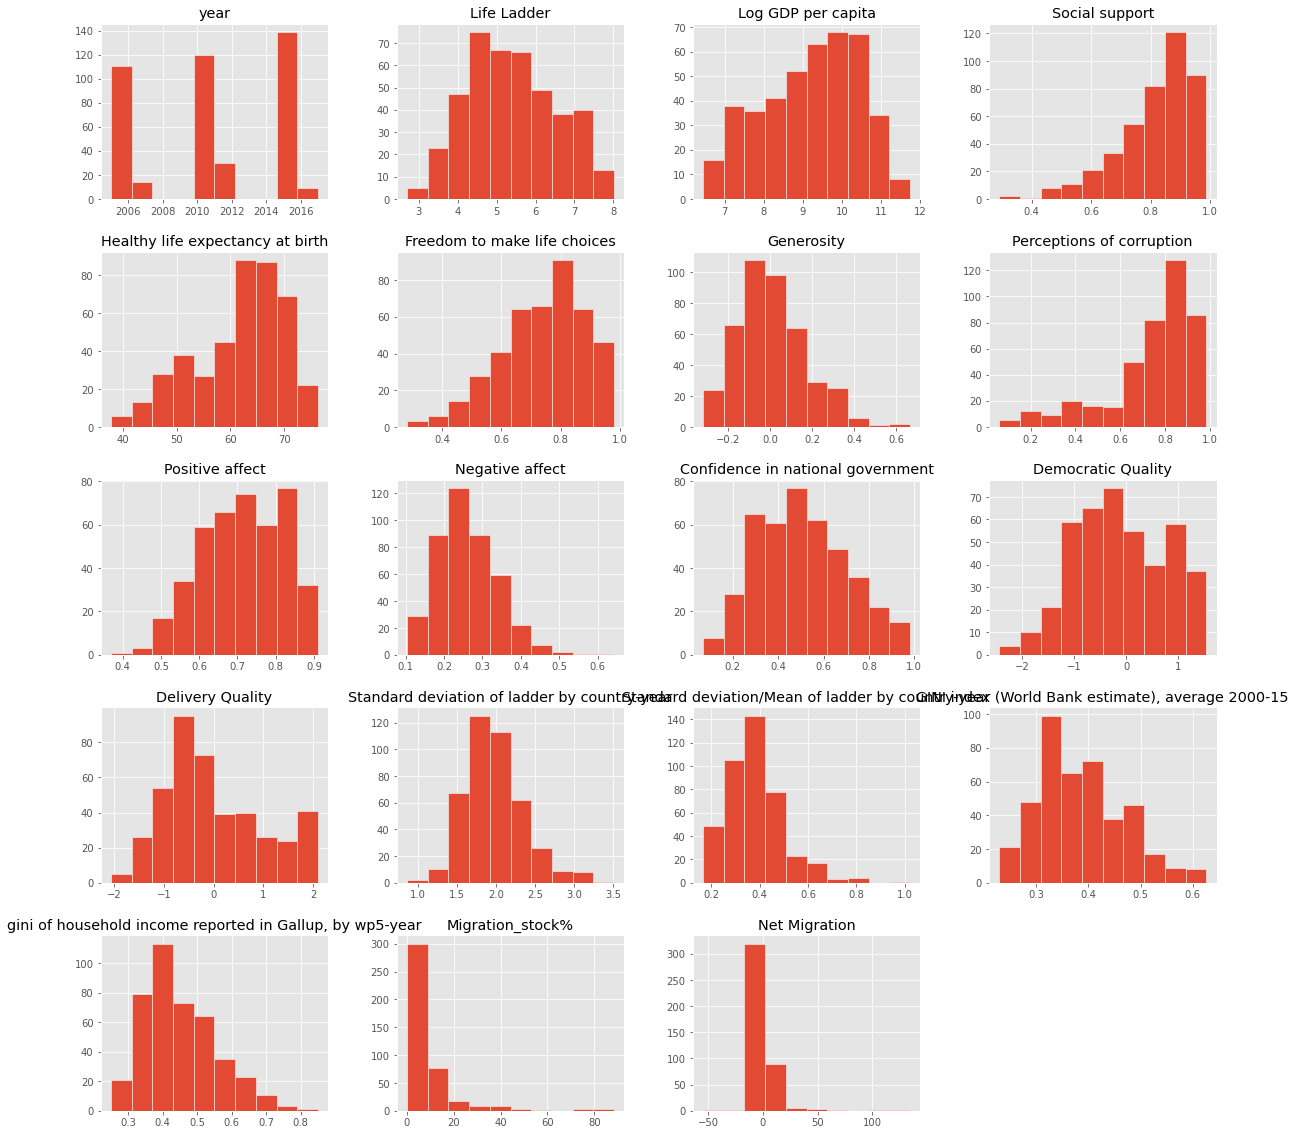

In [83]:
final_df.hist(edgecolor='white', figsize=(20, 20))

    Some of the varaibles are quite skewed especially the Migration_stock% and the Net Migration which are the contestants for the target variable in this project. However, I decided not to remove any outliers as it would mean removing some countries which in this case I do not want to do.

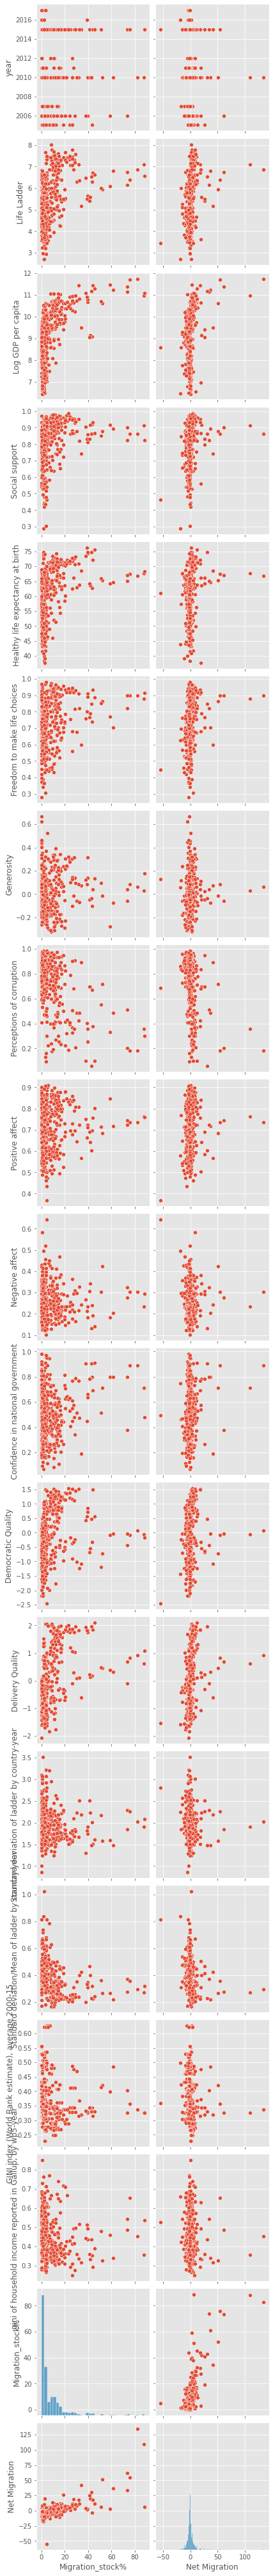

In [84]:
sns.pairplot(final_df, x_vars=["Migration_stock%", "Net Migration"], height=3)

    The above pairplots show that the corelation between both targets and other variables is very small but Net Migration is definitely less sutiable for the project because most datapoints concentrate around the value of zero. I decided to drop the Net migration variable and continue with Migration stock %. I also decided to drop the year variable as it was reducing the accuracy of the model despite attempts to encode or scale.

## Dropping "year" and "Net Migration"

In [85]:
final_df.drop(['year', 'Net Migration'], axis=1, inplace=True)

## Scaling Migration_stock%

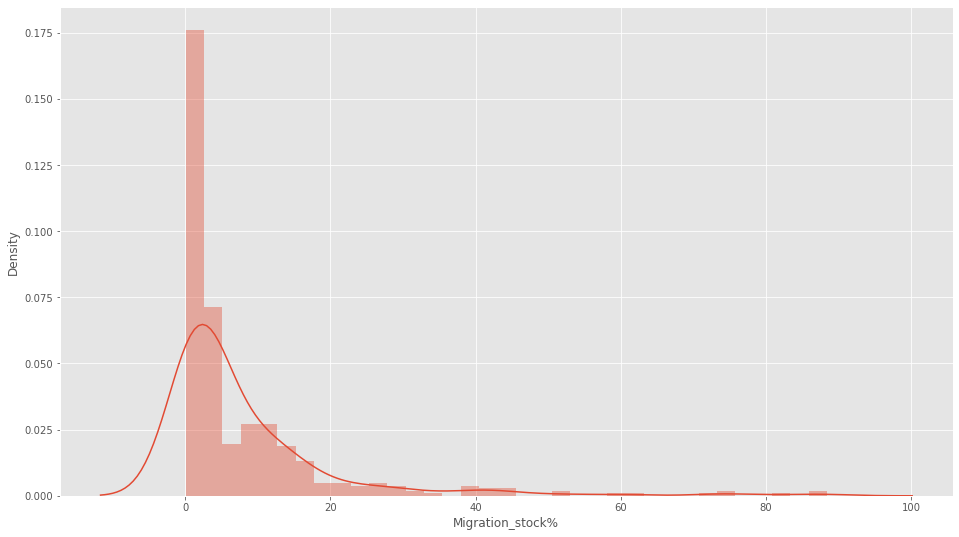

In [86]:
sns.distplot(final_df['Migration_stock%']);

In [87]:
final_df['Log Migration stock%'] = np.log1p(final_df['Migration_stock%']) #sqrt gives NaNs

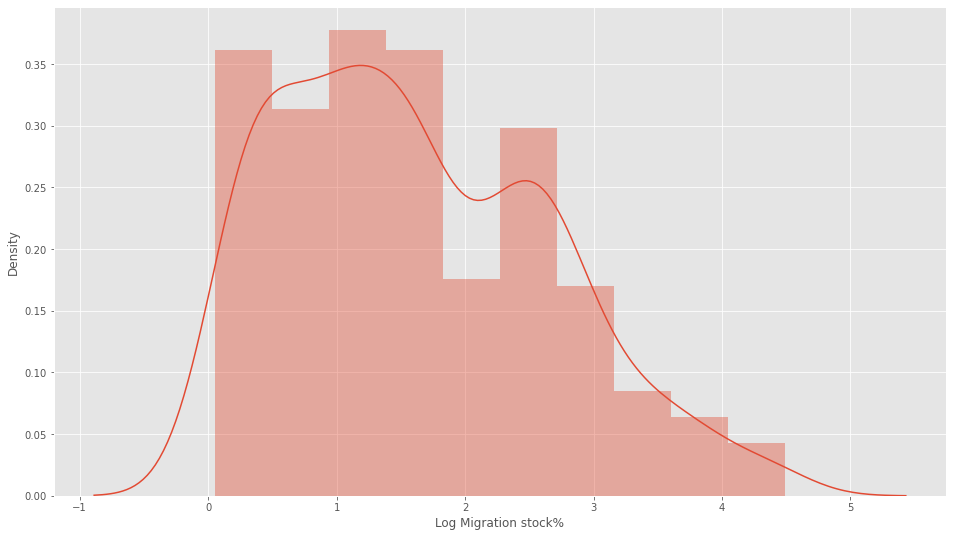

In [88]:
sns.distplot(final_df['Log Migration stock%']);

## Scaling Healthy life expectancy

    Scaling Healthy life expectancy was important because it contained high values (the actual years of life) compared to other variabls and the model was giving it too much importnace. Log1p was performing best.

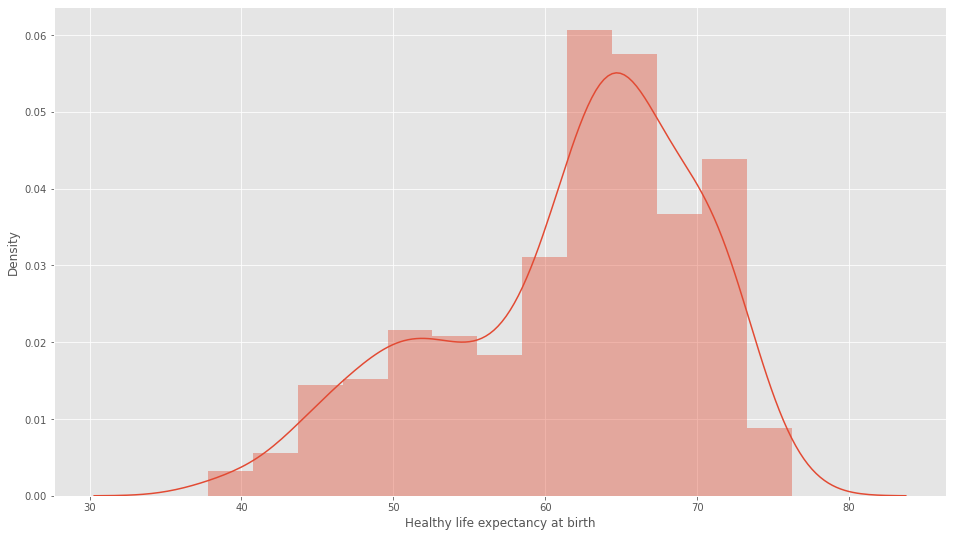

In [89]:
sns.distplot(final_df['Healthy life expectancy at birth']);

In [90]:
final_df['Log Healthy life exp'] = np.log1p(final_df['Healthy life expectancy at birth'])

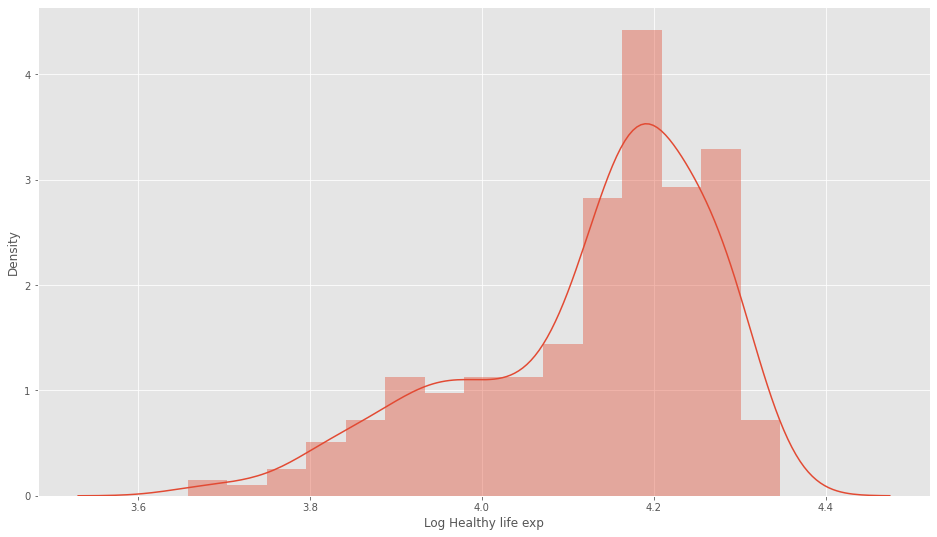

In [91]:
sns.distplot(final_df['Log Healthy life exp']);

## Encoding countries

In [92]:
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder() 
lb_enc

LabelEncoder()

In [93]:
final_df['country_code'] = lb_enc.fit_transform(final_df['country'])
final_df.head()

Life Ladder  Log GDP per capita  Social support  \
0     4.758381            7.386629        0.539075   
1     3.982855            7.466215        0.528597   
2     4.634252            9.077325        0.821372   
3     5.268937            9.203026        0.733152   
4     4.606651            9.303031        0.639356   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.008961                      0.600127    0.137630   
1                         51.693527                      0.388928    0.094686   
2                         66.576630                      0.528605   -0.016183   
3                         67.413696                      0.568958   -0.177533   
4                         68.691956                      0.703851   -0.086883   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.706766         0.618265         0.275324   
1                   0.880638         0.553553         0.339276   
2                   0.874700         0.552678         0.246335   
3                   0.726262         0.647908         0.300060   
4                   0.884793         0.688370         0.350427   

   Confidence in national government  ...  Delivery Quality  \
0                           0.299357  ...         -1.617176   
1                           0.260557  ...         -1.291594   
2                           0.300681  ...         -0.420024   
3                           0.409726  ...         -0.246433   
4                           0.506978  ...         -0.152544   

   Standard deviation of ladder by country-year  \
0                                      1.878622   
1                                      2.160618   
2                                      1.764947   
3                                      1.862201   
4                                      2.729001   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.394803   
1                                           0.542480   
2                                           0.380848   
3                                           0.353430   
4                                           0.592405   

   GINI index (World Bank estimate), average 2000-15  \
0                                           0.409100   
1                                           0.428717   
2                                           0.303250   
3                                           0.303250   
4                                           0.303250   

   gini of household income reported in Gallup, by wp5-year      country  \
0                                           0.327318         Afghanistan   
1                                           0.596918         Afghanistan   
2                                           0.492998             Albania   
3                                           0.543528             Albania   
4                                           0.422627             Albania   

  Migration_stock%  Log Migration stock%  Log Healthy life exp  country_code  
0         0.365658              0.311636              3.932001             0  
1         1.175547              0.777280              3.964493             0  
2         2.100434              1.131542              4.213262             1  
3         1.818957              1.036367              4.225573             1  
4         1.989036              1.094951              4.244085             1  

[5 rows x 21 columns]

# Data visualisation

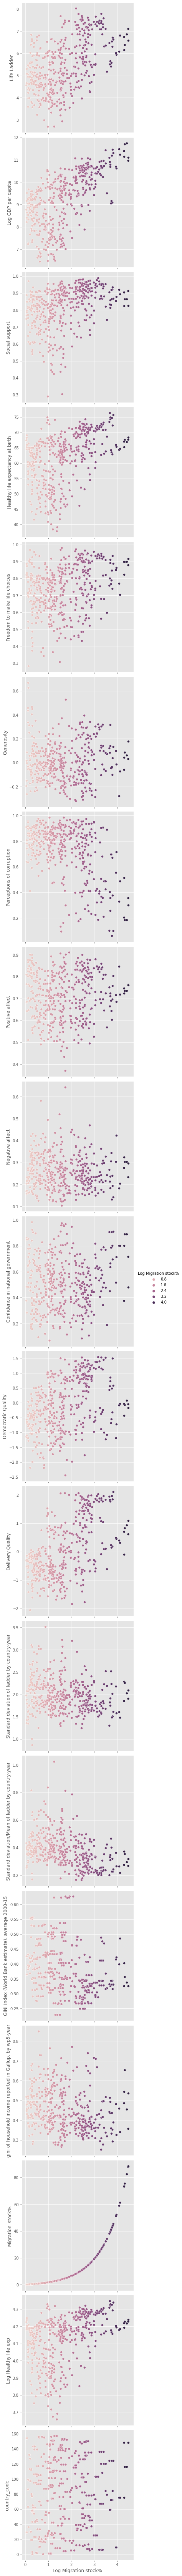

In [94]:
sns.pairplot(final_df, x_vars='Log Migration stock%', height=5, hue="Log Migration stock%")

Basic information from your dataset
 ---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Life Ladder                                               423 non-null    float64
 1   Log GDP per capita                                        423 non-null    float64
 2   Social support                                            423 non-null    float64
 3   Healthy life expectancy at birth                          423 non-null    float64
 4   Freedom to make life choices                              423 non-null    float64
 5   Generosity                                                423 non-null    float64
 6   Perceptions of corruption                                 423 non-null    float64
 7   Positive affect         

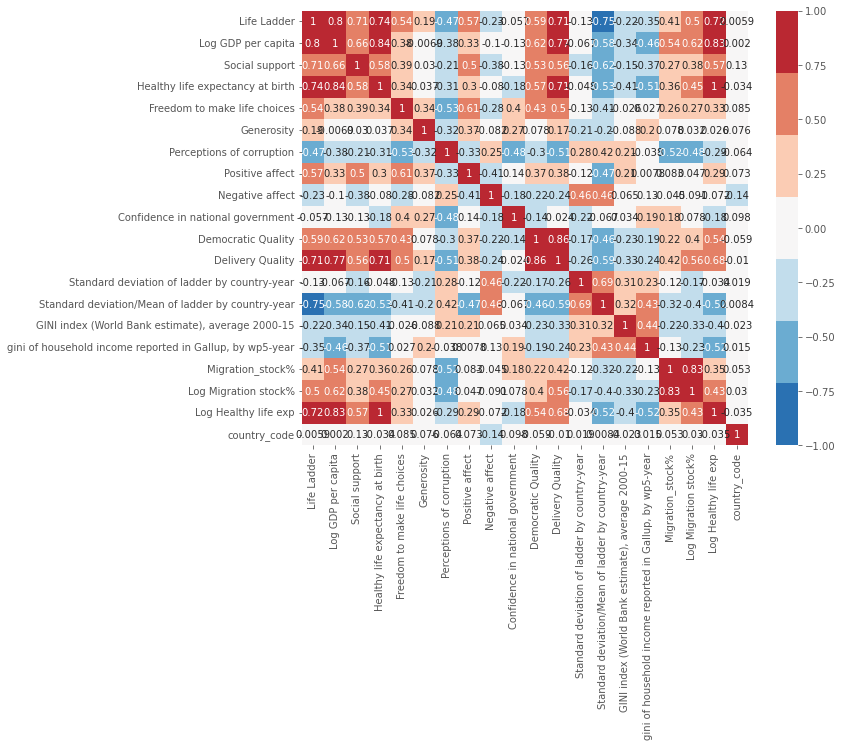

In [95]:
corrCoef(final_df)

In [96]:
import plotly
import plotly.express as px
fig = px.choropleth(df, locations="country", locationmode="country names",
                    color="Life Ladder", color_continuous_scale=['DarkRed','white', 'DarkSlateBlue'],
                    title="Life Ladder score per country")
fig.show()

In [97]:
fig = px.choropleth(final_df, locations="country", locationmode="country names",
                    color="Log Migration stock%", color_continuous_scale=['DarkRed','white', 'DarkSlateBlue'],
                    title="Migration stock % per country")
fig.show()

In [98]:
final_df.country.nunique()

158

# **Regression**

In [99]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import math

## Simple Linear Regression

In [100]:
X = final_df[['Life Ladder', 'Log GDP per capita', 'Healthy life expectancy at birth']]
y = final_df['Log Migration stock%']

In [101]:
X.columns

Index(['Life Ladder', 'Log GDP per capita',
       'Healthy life expectancy at birth'],
      dtype='object')

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [103]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [104]:
y_pred = regressor.predict(X_test)

In [105]:
y_pred_train = regressor.predict(X_train)

In [106]:
regressor.coef_

array([ 0.08076261,  0.65162321, -0.03768505])

In [107]:
X.columns

Index(['Life Ladder', 'Log GDP per capita',
       'Healthy life expectancy at birth'],
      dtype='object')

In [108]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.437983598097465


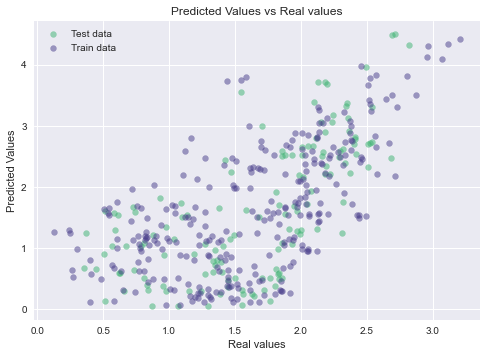

In [109]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [110]:
Allmetrics(regressor,X_train,y_train,X_test,y_test)

MAE       MSE      RMSE        R2  CV_R2
Train  0.665005  0.637936  0.798709  0.387436  0.329
Test   0.683845  0.675933  0.822151  0.437984    NaN

In [111]:
y.describe().T

count    423.000000
mean       1.615936
std        1.047609
min        0.050696
25%        0.731093
50%        1.510547
75%        2.459016
max        4.493166
Name: Log Migration stock%, dtype: float64

    The results are poor, let's try with more variables.

## Multilinear Regression

In [112]:
final_df.columns

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year', 'country',
       'Migration_stock%', 'Log Migration stock%', 'Log Healthy life exp',
       'country_code'],
      dtype='object')

In [113]:
X = final_df.drop(['Migration_stock%', 'Log Migration stock%', 'country', 'Healthy life expectancy at birth'], axis = 1)
y = final_df['Log Migration stock%']

In [114]:
X.columns

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year',
       'Log Healthy life exp', 'country_code'],
      dtype='object')

In [115]:
X.shape

(423, 17)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [117]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = regressor.predict(X_test)

In [119]:
y_pred_train = regressor.predict(X_train)

In [120]:
regressor.coef_

array([ 3.40060228e-01,  4.68746762e-01,  1.09967760e+00, -3.58514441e-01,
       -3.99007008e-01, -9.90604802e-01, -2.69036403e+00,  8.05758188e-01,
        4.87942925e-01, -1.16951608e-01,  2.11563862e-01, -6.63873846e-01,
        2.53130014e+00,  5.58252081e-02, -6.41427569e-02, -2.05391725e+00,
        1.52840056e-04])

In [121]:
X.columns

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year',
       'Log Healthy life exp', 'country_code'],
      dtype='object')

In [122]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.5458968893990181


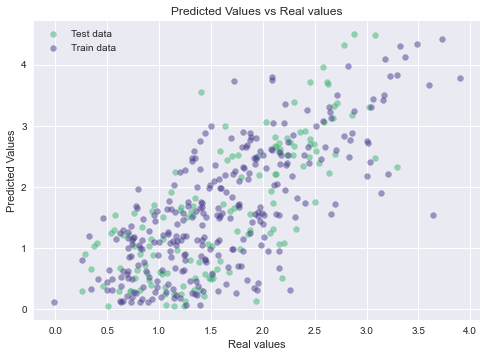

In [123]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [124]:
Allmetrics(regressor,X_train,y_train,X_test,y_test)

MAE       MSE      RMSE        R2  CV_R2
Train  0.562066  0.483930  0.695651  0.535317  0.437
Test   0.618115  0.546146  0.739017  0.545897    NaN

In [125]:
y.describe().T

count    423.000000
mean       1.615936
std        1.047609
min        0.050696
25%        0.731093
50%        1.510547
75%        2.459016
max        4.493166
Name: Log Migration stock%, dtype: float64

    The metrics have improved slightly but still just over 50% acuracy is not a great result. The mean error is still high at about 12 times the minimum value.

## Polynomial Regression

In [126]:
from sklearn.preprocessing import PolynomialFeatures

In [127]:
poly_reg = PolynomialFeatures(degree =2) #Idoia try with 2 max 3 (2 was best, 3 was only 0.1), polinomial without scaling

X_poly = poly_reg.fit_transform(X)
X_poly
X_poly.shape

(423, 171)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [129]:
X_train.shape

(296, 171)

In [130]:
lin_reg_2 = LinearRegression()

lin_reg_2.fit(X_train, y_train)

LinearRegression()

In [131]:
accuracy = lin_reg_2.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = -1.7042745696309023


In [132]:
y_pred = lin_reg_2.predict(X_test)
y_pred

array([ 1.40330505,  1.1180687 ,  1.52219391,  2.74577141,  0.5269928 ,
        2.88414192,  1.93237305,  2.45710182,  2.65064621,  0.16818619,
       -1.56292725,  2.33153915,  1.39808655,  2.77694702,  9.60053062,
       -0.32691956,  1.87448692,  2.27784538,  1.88053703,  0.38577652,
        2.66904449,  0.48208046,  0.80162048,  1.4280777 ,  3.05746269,
        0.55005264,  2.82633972, -0.79579926,  0.78929138,  1.4199791 ,
       -1.83950233,  2.5396862 ,  2.2982254 ,  0.90269089, -1.15078926,
        1.86219978,  5.15788078,  1.20174408,  3.81839752, -0.33639908,
        3.85235214, -0.09045982, -2.1549778 ,  1.94605446,  1.43417931,
        2.03372955,  1.25269127,  0.89123917, -0.61533546,  2.66592407,
        0.76667786,  4.81529045, -2.31421471,  0.99975014,  1.95294952,
        2.48809624,  1.79915619,  0.2436657 ,  2.26561737,  0.92113876,
       -1.47351837,  0.11879921,  3.55099869,  1.89885521,  2.28093719,
       -2.36767387,  1.10786819,  0.64204407,  3.10571289,  1.42

In [133]:
score_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
score_df

Actual  Predicted
145  1.033742   1.403305
280  0.668379   1.118069
175  3.388210   1.522194
410  1.707424   2.745771
419  0.581671   0.526993
..        ...        ...
394  4.486840   4.515535
108  1.156438   3.040979
101  2.320712   1.445299
361  3.314228   4.404121
29   2.524703   1.789770

[127 rows x 2 columns]

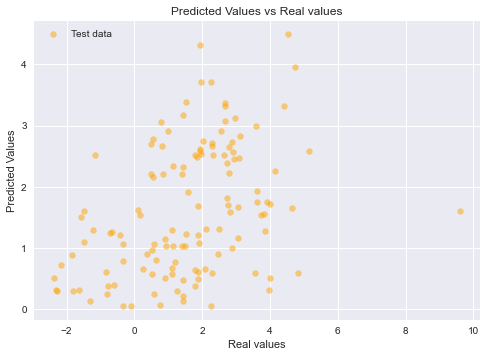

In [134]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'orange', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [135]:
Allmetrics(lin_reg_2,X_train,y_train,X_test,y_test)

MAE       MSE      RMSE        R2  CV_R2
Train  0.810503  0.983705  0.991819  0.092798 -1.593
Test   1.343388  3.027395  1.739941 -1.704275    NaN

    Very bad results, polinomial model is not suitable for this data. Let's try the pipeline!

## Pipeline

In [136]:
models = Reg_GetBasedModel()
models

[('LinearR', LinearRegression()),
 ('Ridge', Ridge()),
 ('Lasso', Lasso()),
 ('DT-R', DecisionTreeRegressor()),
 ('SVM-R', SVR()),
 ('RF-R', RandomForestRegressor())]

In [137]:
Base_model = Reg_basedModels(X_train, y_train,'r2', models)

LinearR: r2 = -1.593015 (std = 1.160172)
Ridge: r2 = 0.454468 (std = 0.242368)
Lasso: r2 = 0.401054 (std = 0.149610)
DT-R: r2 = 0.353959 (std = 0.192094)
SVM-R: r2 = -0.010768 (std = 0.043506)
RF-R: r2 = 0.633756 (std = 0.093384)


## Random Forest Regressor

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [139]:
rand_forest = RandomForestRegressor(n_estimators=100, random_state=42)
rand_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [140]:
y_pred_test_RF = rand_forest.predict(X_test)

In [141]:
y_pred_train_RF = rand_forest.predict(X_train)

In [142]:
score_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_RF})
score_df
#use exp to unscale and pick 3 countries to present accuracy

Actual  Predicted
145  1.033742   1.131073
280  0.668379   1.021374
175  3.388210   2.454818
410  1.707424   1.462699
419  0.581671   0.965799
..        ...        ...
376  1.566532   1.332573
311  0.517654   1.576119
211  3.559502   1.730325
152  0.298335   0.657016
291  1.513323   1.045476

[140 rows x 2 columns]

In [143]:
score_df = np.expm1(score_df)
score_df

Actual  Predicted
145   1.811567   2.098979
280   0.951072   1.777009
175  28.612892  10.644313
410   4.514737   3.317596
419   0.789026   1.626887
..         ...        ...
376   3.790007   2.790783
311   0.678086   3.836150
211  34.145680   4.642488
152   0.347614   0.929028
291   3.541800   1.844753

[140 rows x 2 columns]

In [144]:
score_ind = score_df.index
score_ind

Int64Index([145, 280, 175, 410, 419,  73, 132, 137,  30,  72,
            ...
            114, 299, 421, 141, 155, 376, 311, 211, 152, 291],
           dtype='int64', length=140)

In [145]:
score_countr = final_df.loc[score_ind, 'country']
score_countr

145       Guinea
280        Niger
175       Israel
410    Venezuela
419       Zambia
         ...    
376         Togo
311      Romania
211      Lebanon
152     Honduras
291       Panama
Name: country, Length: 140, dtype: object

In [146]:
score_df['country'] = score_countr
score_df

Actual  Predicted    country
145   1.811567   2.098979     Guinea
280   0.951072   1.777009      Niger
175  28.612892  10.644313     Israel
410   4.514737   3.317596  Venezuela
419   0.789026   1.626887     Zambia
..         ...        ...        ...
376   3.790007   2.790783       Togo
311   0.678086   3.836150    Romania
211  34.145680   4.642488    Lebanon
152   0.347614   0.929028   Honduras
291   3.541800   1.844753     Panama

[140 rows x 3 columns]

In [147]:
score_df['Diff'] = score_df['Actual'] - score_df['Predicted']
score_df[(score_df['Diff'] > -1) & (score_df['Diff'] < 1)]

Actual  Predicted                 country      Diff
145   1.811567   2.098979                  Guinea -0.287413
280   0.951072   1.777009                   Niger -0.825937
419   0.789026   1.626887                  Zambia -0.837861
137   1.457397   1.417158                   Ghana  0.040239
316   8.116218   8.032484                  Russia  0.083734
9     4.380958   4.347221               Argentina  0.033737
231   1.474100   1.614180                  Malawi -0.140080
239   8.028850   8.152049                   Malta -0.123199
298   0.286195   0.908619                    Peru -0.622424
79    0.248609   0.933173                Colombia -0.684564
331   1.413457   2.019269            Sierra Leone -0.605812
194   2.141201   2.106518                   Kenya  0.034683
184   0.829367   1.656187                 Jamaica -0.826820
39    1.180715   1.753487                 Bolivia -0.572773
168   3.719105   3.866027                    Iran -0.146922
418   1.075176   1.428810                  Zambia -0.353634
33   12.283533  12.824054                 Belgium -0.540521
113   0.605646   0.774307             El Salvador -0.168661
401  14.490654  14.458090           United States  0.032564
283   0.658124   1.499695                 Nigeria -0.841571
281   0.464159   1.009928                 Nigeria -0.545768
278   0.922929   1.562377                   Niger -0.639448
82    1.805938   1.775208                 Comoros  0.030730
408   3.999243   4.154845               Venezuela -0.155602
172  14.012560  14.553360                 Ireland -0.540800
42    1.233169   1.881668  Bosnia and Herzegovina -0.648499
296   2.356667   1.440333                Paraguay  0.916333
46    5.904393   4.923157                Botswana  0.981236
409   4.592012   4.858193               Venezuela -0.266182
411   0.061479   1.037424                 Vietnam -0.975944
57    2.486588   1.778694                 Burundi  0.707894
131   4.220248   4.775380                 Georgia -0.555132
290   1.920846   2.011560                Pakistan -0.090714
204   0.338389   1.024636                    Laos -0.686247
45    4.765497   5.589811                Botswana -0.824314
314   8.123785   7.848005                  Russia  0.275779
60    0.474794   0.769139                Cambodia -0.294344
63    1.636314   2.133559                Cameroon -0.497246
268   1.817646   2.108243                   Nepal -0.290597
324   1.976508   1.844650                 Senegal  0.131858
400  14.258484  14.293283           United States -0.034800
26    0.887465   1.654162              Bangladesh -0.766697
108   2.178592   1.522200                 Ecuador  0.656392
101   9.182918   8.459457                 Denmark  0.723461
114   0.667803   0.929922             El Salvador -0.262119
421   2.847388   2.404766                Zimbabwe  0.442621
141   0.434270   0.827579               Guatemala -0.393309
376   3.790007   2.790783                    Togo  0.999224
152   0.347614   0.929028                Honduras -0.581414

In [148]:
px.scatter(score_df, x= 'Actual', y= 'Predicted', hover_name = 'country')

In [149]:
px.bar( score_df, x= 'country', y= ['Actual', 'Predicted'], barmode='group')

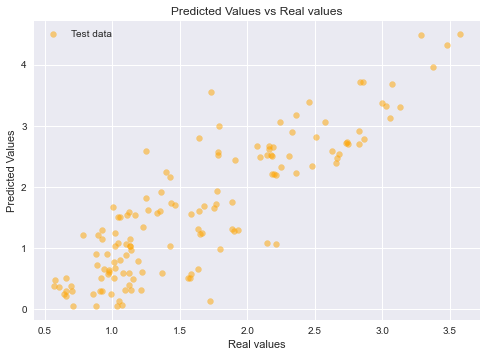

In [150]:
plt.style.use('seaborn')
plt.scatter(y_pred_test_RF, y_test, color = 'orange', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

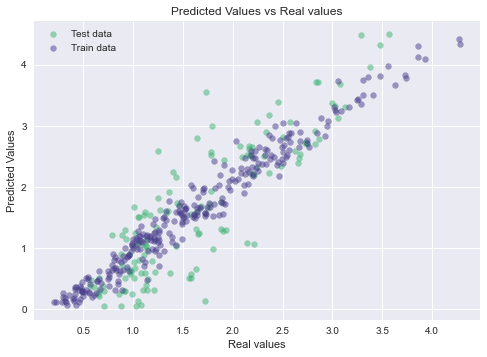

In [151]:
plt.style.use('seaborn')
plt.scatter(y_pred_test_RF, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train_RF, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [152]:
Allmetrics(rand_forest,X_train,y_train,X_test,y_test).round(2)

MAE   MSE  RMSE    R2  CV_R2
Train  0.18  0.05  0.23  0.95   0.63
Test   0.46  0.34  0.58  0.72    NaN

In [153]:
y.describe().T.round(2)

count    423.00
mean       1.62
std        1.05
min        0.05
25%        0.73
50%        1.51
75%        2.46
max        4.49
Name: Log Migration stock%, dtype: float64

    The results have improved but better accuracy for the train set than for the test set mean that the the model is overfitting. There is certainly not enough data to properly train the model. Firstly, there are only up to three samples per country, and, secondly, there are only 158 countries in this dataset which means that not all the world countries are present. There are also many outliers which I deliberately kept as the are genuine countries and I wanted them all to be represented in the model. The mean error has improved to about 4 times the minimum amount for the train and about 9 times for the test, which is still fairly high though. The square errors are higher so this again indicates overfitting. Nevertheless, there is an improvemnt and I think that over 70% accuracy achived with this small dataset mean that the idea was good and the World Happiness Index can be very useful for predicting human migration.

## Hypertunning

In [154]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[7, 8, 9, 10, 11, 12, 13], 'n_estimators':[70, 80, 90, 100, 110, 120]}

rand_frst_reg = RandomForestRegressor(random_state=42)

grid_rand_forest = GridSearchCV(rand_frst_reg, param_grid, scoring="r2", 
                                n_jobs=-1, cv=5)

In [155]:
%%time
grid_rand_forest.fit(X_train, y_train)

CPU times: total: 1.39 s
Wall time: 15.9 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9, 10, 11, 12, 13],
                         'n_estimators': [70, 80, 90, 100, 110, 120]},
             scoring='r2')

In [156]:
grid_rand_forest.best_params_

{'max_depth': 10, 'n_estimators': 80}

In [157]:
rand_forest = RandomForestRegressor(n_estimators=80, max_depth=10, random_state=42)
rand_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=80, random_state=42)

In [158]:
y_pred_RF = rand_forest.predict(X_test)

In [159]:
Allmetrics(rand_forest,X_train,y_train,X_test,y_test)

MAE       MSE      RMSE        R2  CV_R2
Train  0.193839  0.059724  0.244385  0.942651  0.628
Test   0.473132  0.352677  0.593866  0.706760    NaN

    Hypertuning did not bring much improvemnt, it penalised the train set a little which may result in some errors not being as high but I decided to go with the previous model as he results were better.

# **Reducing the number of features with PCA**

In [160]:
X = final_df.drop(['Migration_stock%', 'Log Migration stock%', 'country', 'Log Healthy life exp'], axis = 1)
y = final_df['Log Migration stock%']

In [161]:
X.head()

Life Ladder  Log GDP per capita  Social support  \
0     4.758381            7.386629        0.539075   
1     3.982855            7.466215        0.528597   
2     4.634252            9.077325        0.821372   
3     5.268937            9.203026        0.733152   
4     4.606651            9.303031        0.639356   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.008961                      0.600127    0.137630   
1                         51.693527                      0.388928    0.094686   
2                         66.576630                      0.528605   -0.016183   
3                         67.413696                      0.568958   -0.177533   
4                         68.691956                      0.703851   -0.086883   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.706766         0.618265         0.275324   
1                   0.880638         0.553553         0.339276   
2                   0.874700         0.552678         0.246335   
3                   0.726262         0.647908         0.300060   
4                   0.884793         0.688370         0.350427   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.299357           -1.991810         -1.617176   
1                           0.260557           -1.844364         -1.291594   
2                           0.300681           -0.045108         -0.420024   
3                           0.409726           -0.033831         -0.246433   
4                           0.506978            0.251629         -0.152544   

   Standard deviation of ladder by country-year  \
0                                      1.878622   
1                                      2.160618   
2                                      1.764947   
3                                      1.862201   
4                                      2.729001   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.394803   
1                                           0.542480   
2                                           0.380848   
3                                           0.353430   
4                                           0.592405   

   GINI index (World Bank estimate), average 2000-15  \
0                                           0.409100   
1                                           0.428717   
2                                           0.303250   
3                                           0.303250   
4                                           0.303250   

   gini of household income reported in Gallup, by wp5-year  country_code  
0                                           0.327318                    0  
1                                           0.596918                    0  
2                                           0.492998                    1  
3                                           0.543528                    1  
4                                           0.422627                    1

In [162]:
scaler = StandardScaler()
scaler

StandardScaler()

In [163]:
X_sc = scaler.fit_transform(X)

In [164]:
X_sc = pd.DataFrame(X_sc, columns=X.columns)
X_sc.head()

Life Ladder  Log GDP per capita  Social support  \
0    -0.561136           -1.464153       -2.222300   
1    -1.237016           -1.399230       -2.306513   
2    -0.669316           -0.084963        0.046560   
3    -0.116180            0.017577       -0.662473   
4    -0.693370            0.099157       -1.416326   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         -1.395410                     -0.986108    0.801786   
1                         -1.193192                     -2.493518    0.538144   
2                          0.593400                     -1.496590   -0.142490   
3                          0.693883                     -1.208571   -1.133035   
4                          0.847327                     -0.245795   -0.576526   

   Perceptions of corruption  Positive affect  Negative affect  \
0                  -0.172513        -0.880642         0.194055   
1                   0.718636        -1.488654         1.017155   
2                   0.688198        -1.496880        -0.179046   
3                  -0.072592        -0.602131         0.512426   
4                   0.739931        -0.221966         1.160669   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                          -1.035041           -2.153780         -1.643876   
1                          -1.230957           -1.985014         -1.312547   
2                          -1.028360            0.074403         -0.425594   
3                          -0.477753            0.087311         -0.248939   
4                           0.013309            0.414046         -0.153393   

   Standard deviation of ladder by country-year  \
0                                     -0.263603   
1                                      0.491931   
2                                     -0.568164   
3                                     -0.307597   
4                                      2.014764   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.084151   
1                                           1.336047   
2                                          -0.034145   
3                                          -0.266575   
4                                           1.759273   

   GINI index (World Bank estimate), average 2000-15  \
0                                           0.286177   
1                                           0.524091   
2                                          -0.997587   
3                                          -0.997587   
4                                          -0.997587   

   gini of household income reported in Gallup, by wp5-year  country_code  
0                                          -1.187076            -1.749072  
1                                           1.381004            -1.749072  
2                                           0.391110            -1.727093  
3                                           0.872440            -1.727093  
4                                          -0.279209            -1.727093

## PCA model

In [165]:
#Instantiate the PCA object
pca = PCA(n_components=10) 
pca

PCA(n_components=10)

In [166]:
# Fit the model with the data
pca.fit(X_sc) 
pca

PCA(n_components=10)

In [167]:
pca.explained_variance_ratio_ #try to take our ratio and you get Eigenvalue

array([0.37678041, 0.14376681, 0.09878194, 0.07627429, 0.06156196,
       0.04930057, 0.04635368, 0.03030394, 0.02603834, 0.02070858])

In [168]:
# Let's have a look at the explained variance for each PC
expl = pca.explained_variance_ratio_
print('Explained variance of each PC:', np.round(expl, 3))
print('Cumulative explained variance:',round(sum(expl),3)) #sum is cumulative(slides)

Explained variance of each PC: [0.377 0.144 0.099 0.076 0.062 0.049 0.046 0.03  0.026 0.021]
Cumulative explained variance: 0.93


In [169]:
plot_cum_variance(pca)

## PCA with 9 components

In [170]:
pca = PCA(n_components=9) 
pca.fit(X_sc) 
pca

PCA(n_components=9)

In [171]:
plot_cum_variance(pca)

In [172]:
# Transform the dataframe
X_pca = pca.transform(X_sc)
print('\nShape of original_data:', X.shape)
print('Shape of X_pca:', X_pca.shape)


Shape of original_data: (423, 17)
Shape of X_pca: (423, 9)


In [173]:
names= []
for i in range(1,len(pca.components_)+1):
    print('PC{}'.format(i))
    names.append('PC{}'.format(i))

PC1
PC2
PC3
PC4
PC5
PC6
PC7
PC8
PC9


In [174]:
X_pca = pd.DataFrame(X_pca, columns=names)
X_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.222591 -0.035693 -1.704002  0.327474 -1.563752  0.604799  1.898678   
1    5.096627 -0.634339 -0.236984  0.927629 -1.760607  1.146209  0.341449   
2    0.915598 -1.819090 -1.321740  0.454719 -1.579487  0.521533 -0.481778   
3    0.594127 -1.398629 -0.640638  1.022427 -1.580097 -0.431166 -0.350616   
4    1.533880 -1.841604  1.301115  2.009636 -0.713054 -0.534289  0.316286   
..        ...       ...       ...       ...       ...       ...       ...   
418  0.869880  1.218713  0.271761 -2.753632  0.406326  0.744615 -0.940611   
419  3.293569  0.810923  3.654770  0.499591  1.660454 -0.267057 -0.992946   
420  4.235619  0.323885 -0.189676 -1.754390  1.116386  1.139010 -0.740194   
421  2.208800  2.331795 -1.268159 -2.811428  0.680323  0.423923 -0.985037   
422  3.403196  1.661049  0.390327 -1.123469  1.465273 -0.288978 -1.328309   

          PC8       PC9  
0    0.153069 -0.791704  
1    0.821942 -1.385861  
2   -0.085238 -0.947759  
3    0.532551 -0.852412  
4   -1.849660 -0.149337  
..        ...       ...  
418  0.898506  0.608648  
419  0.084613  0.588282  
420  1.092080 -0.448752  
421  0.979098 -0.817342  
422 -0.359494 -0.818579  

[423 rows x 9 columns]

In [175]:
pca_scores_visual(X_pca, 1,2)

In [176]:
pca_scores_visual(X_pca, 1,3)

In [177]:
pca_scores_visual(X_pca, 2,3)

In [178]:
pca.components_[0]

array([-0.35182949, -0.32965497, -0.30054867, -0.31113941, -0.24649736,
       -0.09291511,  0.22264757, -0.23237971,  0.16396607, -0.01951825,
       -0.29317395, -0.34125888,  0.14776432,  0.32663143,  0.14555645,
        0.16668616, -0.01649757])

In [179]:
pca.components_.shape

(9, 17)

In [180]:
pca_comp_df = pd.DataFrame(pca.components_.round(4), columns=X_sc.columns)
pca_comp_df

Life Ladder  Log GDP per capita  Social support  \
0      -0.3518             -0.3297         -0.3005   
1      -0.0509             -0.2203         -0.0984   
2       0.1534              0.1280          0.0855   
3      -0.0220              0.1105         -0.3296   
4       0.0047              0.0892          0.1080   
5       0.0149             -0.1074         -0.0055   
6       0.2200              0.0638          0.0641   
7       0.2051              0.1531          0.0025   
8      -0.1292             -0.0665         -0.0753   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                           -0.3111                       -0.2465     -0.0929   
1                           -0.2533                        0.3115      0.3587   
2                            0.0925                        0.2123      0.0197   
3                            0.1526                        0.0782      0.2160   
4                            0.0820                        0.0451     -0.0367   
5                           -0.0091                       -0.1618      0.7448   
6                            0.1498                        0.0655      0.2242   
7                           -0.0441                       -0.3571     -0.1303   
8                           -0.1065                        0.3562     -0.0603   

   Perceptions of corruption  Positive affect  Negative affect  \
0                     0.2226          -0.2324           0.1640   
1                    -0.3037           0.2715          -0.2284   
2                     0.0322           0.2696           0.2711   
3                    -0.3643          -0.3306           0.4665   
4                    -0.0734          -0.0919           0.0170   
5                     0.2506           0.1261           0.1561   
6                     0.0449           0.2293           0.2572   
7                    -0.3189          -0.1271           0.3949   
8                     0.4432          -0.0113           0.4899   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                            -0.0195             -0.2932           -0.3413   
1                             0.4677             -0.0944           -0.0530   
2                            -0.1304              0.1580            0.0933   
3                             0.2584              0.0535            0.1844   
4                             0.1417             -0.1793           -0.0764   
5                            -0.4461              0.0585            0.0205   
6                             0.1705             -0.5439           -0.3874   
7                            -0.1132             -0.1699            0.0236   
8                             0.2384              0.3037            0.0953   

   Standard deviation of ladder by country-year  \
0                                        0.1478   
1                                       -0.1754   
2                                        0.5866   
3                                        0.0992   
4                                        0.2336   
5                                       -0.1118   
6                                        0.1273   
7                                       -0.3009   
8                                       -0.2936   

   Standard deviation/Mean of ladder by country-year  \
0                                             0.3266   
1                                            -0.0443   
2                                             0.2753   
3                                             0.1622   
4                                             0.1374   
5                                            -0.0481   
6                                            -0.1505   
7                                            -0.3406   
8                                            -0.1144   

   GINI index (World Bank estimate), average 2000-15  \
0                                             0.1456   
1                        

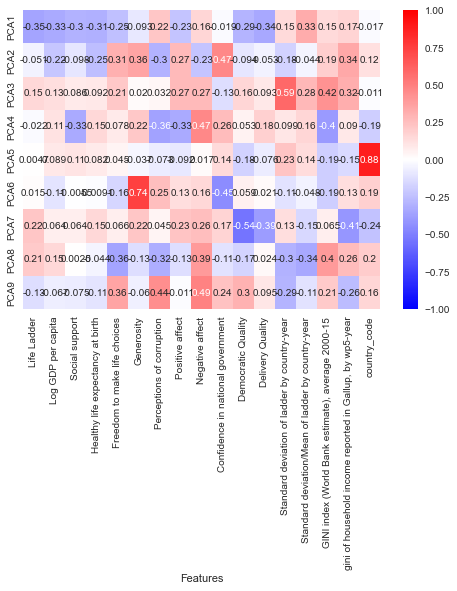

In [181]:
pca_loadings_visual(pca, pca_comp_df)

In [182]:
weight_loadings(pca, pca_comp_df)

In [183]:
# loadings = pca.components_.T
# loadings[1, 0]
# features = X.columns

In [184]:
biplot(pca_comp_df, X_pca, pca, 1,2) #if it runs delete the two above

## Random Forest with X_pca as non-target 

In [185]:
X = X_pca

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.33, 
                                                   random_state = 42)

In [187]:
rand_forest = RandomForestRegressor(n_estimators=100, random_state=42)
rand_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [188]:
y_pred_RF = rand_forest.predict(X_test)
y_pred_RF

array([0.87754408, 0.89984405, 1.9436439 , 1.65233491, 1.14796126,
       2.0781172 , 2.11270606, 0.81273278, 2.0361771 , 1.00289905,
       1.21593281, 2.39404265, 2.20599443, 2.38826354, 1.28233241,
       1.57457264, 1.5642831 , 1.81711408, 0.92683238, 0.89146795,
       1.96497371, 2.51919519, 1.66538368, 0.91431336, 0.87832047,
       1.61106538, 0.91798866, 1.09216586, 2.86614526, 0.62659115,
       1.13614416, 1.9397633 , 1.86712273, 0.76707395, 2.14170278,
       0.91006018, 1.31150547, 1.08457814, 0.90211156, 1.93325007,
       2.13013322, 1.01701084, 1.08232431, 2.41906981, 0.77601211,
       2.93614036, 1.00152466, 0.85521475, 0.89301952, 2.75476431,
       1.88317305, 0.94235942, 1.11999563, 2.18760987, 2.80648594,
       1.65985099, 1.14655538, 0.99112122, 1.47136889, 0.92530855,
       1.66258839, 0.71664844, 1.11565191, 1.9987339 , 2.69513323,
       0.95952514, 1.99689994, 1.63725761, 2.59976598, 2.76909602,
       2.08757882, 1.0158395 , 1.40976235, 1.65337389, 2.26663

In [189]:
y_test

145    1.033742
280    0.668379
175    3.388210
410    1.707424
419    0.581671
         ...   
376    1.566532
311    0.517654
211    3.559502
152    0.298335
291    1.513323
Name: Log Migration stock%, Length: 140, dtype: float64

In [190]:
Allmetrics(rand_forest,X_train,y_train,X_test,y_test)

MAE       MSE      RMSE        R2  CV_R2
Train  0.199393  0.066968  0.258781  0.935696  0.504
Test   0.584703  0.530733  0.728514  0.558712    NaN

    Again not much improvement compared to the first Randome Forest model I tried so I am sticking with the first one.

## Pipeline with PCA

In [191]:
models = Reg_GetBasedModel()
models

[('LinearR', LinearRegression()),
 ('Ridge', Ridge()),
 ('Lasso', Lasso()),
 ('DT-R', DecisionTreeRegressor()),
 ('SVM-R', SVR()),
 ('RF-R', RandomForestRegressor())]

In [192]:
Base_model = Reg_basedModels(X_train, y_train,'r2', models)

LinearR: r2 = 0.393879 (std = 0.158418)
Ridge: r2 = 0.394186 (std = 0.157787)
Lasso: r2 = 0.092954 (std = 0.042242)
DT-R: r2 = 0.168680 (std = 0.433920)
SVM-R: r2 = 0.561924 (std = 0.095832)
RF-R: r2 = 0.498652 (std = 0.175690)


    Reduction of features with PCA does not improve the metrics.

# **Country segmentation with KMeans**

In [193]:
df_kmean_raw = final_df.drop(['Log Migration stock%', 'Log Healthy life exp', 'country'], axis = 1)
df_kmean_raw.head()

Life Ladder  Log GDP per capita  Social support  \
0     4.758381            7.386629        0.539075   
1     3.982855            7.466215        0.528597   
2     4.634252            9.077325        0.821372   
3     5.268937            9.203026        0.733152   
4     4.606651            9.303031        0.639356   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.008961                      0.600127    0.137630   
1                         51.693527                      0.388928    0.094686   
2                         66.576630                      0.528605   -0.016183   
3                         67.413696                      0.568958   -0.177533   
4                         68.691956                      0.703851   -0.086883   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.706766         0.618265         0.275324   
1                   0.880638         0.553553         0.339276   
2                   0.874700         0.552678         0.246335   
3                   0.726262         0.647908         0.300060   
4                   0.884793         0.688370         0.350427   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.299357           -1.991810         -1.617176   
1                           0.260557           -1.844364         -1.291594   
2                           0.300681           -0.045108         -0.420024   
3                           0.409726           -0.033831         -0.246433   
4                           0.506978            0.251629         -0.152544   

   Standard deviation of ladder by country-year  \
0                                      1.878622   
1                                      2.160618   
2                                      1.764947   
3                                      1.862201   
4                                      2.729001   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.394803   
1                                           0.542480   
2                                           0.380848   
3                                           0.353430   
4                                           0.592405   

   GINI index (World Bank estimate), average 2000-15  \
0                                           0.409100   
1                                           0.428717   
2                                           0.303250   
3                                           0.303250   
4                                           0.303250   

   gini of household income reported in Gallup, by wp5-year  Migration_stock%  \
0                                           0.327318                 0.365658   
1                                           0.596918                 1.175547   
2                                           0.492998                 2.100434   
3                                           0.543528                 1.818957   
4                                           0.422627                 1.989036   

   country_code  
0             0  
1             0  
2             1  
3             1  
4             1

In [194]:
# Normalize the variables with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Store it separately for clustering
df_kmean = scaler.fit_transform(df_kmean_raw)

In [195]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []  #instant an empty list called inertia

#First : Get the Best KMeans 
ks = range(1,19)

for i in ks:
    kmeans = KMeans(n_clusters= i, random_state=7)  #instantiate the kmeans model 19 times
    kmeans.fit(df_kmean)  #fit the model
    inertia.append(kmeans.inertia_)

In [196]:
from kneed import KneeLocator
kl = KneeLocator(ks, inertia,curve="convex", direction="decreasing")
print('The elbow point of the model is:', kl.elbow)

The elbow point of the model is: 4


In [197]:
# Final model with k=3 (chose to go with 3 as the results were more easily understandable)
kmeans = KMeans(n_clusters=3, 
                max_iter=400, random_state=42)

kmeans.fit(df_kmean)

KMeans(max_iter=400, n_clusters=3, random_state=42)

In [198]:
kmeans.labels_

array([1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,
       0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0,
       0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

In [199]:
final_df['cluster_id'] = kmeans.labels_
final_df.head()

Life Ladder  Log GDP per capita  Social support  \
0     4.758381            7.386629        0.539075   
1     3.982855            7.466215        0.528597   
2     4.634252            9.077325        0.821372   
3     5.268937            9.203026        0.733152   
4     4.606651            9.303031        0.639356   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.008961                      0.600127    0.137630   
1                         51.693527                      0.388928    0.094686   
2                         66.576630                      0.528605   -0.016183   
3                         67.413696                      0.568958   -0.177533   
4                         68.691956                      0.703851   -0.086883   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.706766         0.618265         0.275324   
1                   0.880638         0.553553         0.339276   
2                   0.874700         0.552678         0.246335   
3                   0.726262         0.647908         0.300060   
4                   0.884793         0.688370         0.350427   

   Confidence in national government  ...  \
0                           0.299357  ...   
1                           0.260557  ...   
2                           0.300681  ...   
3                           0.409726  ...   
4                           0.506978  ...   

   Standard deviation of ladder by country-year  \
0                                      1.878622   
1                                      2.160618   
2                                      1.764947   
3                                      1.862201   
4                                      2.729001   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.394803   
1                                           0.542480   
2                                           0.380848   
3                                           0.353430   
4                                           0.592405   

   GINI index (World Bank estimate), average 2000-15  \
0                                           0.409100   
1                                           0.428717   
2                                           0.303250   
3                                           0.303250   
4                                           0.303250   

   gini of household income reported in Gallup, by wp5-year      country  \
0                                           0.327318         Afghanistan   
1                                           0.596918         Afghanistan   
2                                           0.492998             Albania   
3                                           0.543528             Albania   
4                                           0.422627             Albania   

   Migration_stock% Log Migration stock%  Log Healthy life exp  country_code  \
0          0.365658             0.311636              3.932001             0   
1          1.175547             0.777280              3.964493             0   
2          2.100434             1.131542              4.213262             1   
3          1.818957             1.036367              4.225573             1   
4          1.989036             1.094951              4.244085             1   

   cluster_id  
0           1  
1           1  
2           2  
3           2  
4           2  

[5 rows x 22 columns]

## Clusters results - mean & count

In [201]:
mean_clusters = final_df.groupby(['cluster_id'])['Migration_stock%', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality'].mean().round(2).reset_index()
mean_clusters

cluster_id  Migration_stock%  Life Ladder  Log GDP per capita  \
0           0             22.74         6.95               10.74   
1           1              2.34         4.33                7.89   
2           2              7.14         5.62                9.57   

   Social support  Healthy life expectancy at birth  \
0            0.93                             70.69   
1            0.71                             52.77   
2            0.85                             64.95   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                          0.89        0.13                       0.44   
1                          0.70        0.04                       0.78   
2                          0.71       -0.06                       0.83   

   Positive affect  Negative affect  Confidence in national government  \
0             0.80             0.22                               0.57   
1             0.68             0.26                               0.60   
2             0.71             0.27                               0.41   

   Democratic Quality  Delivery Quality  
0                1.00              1.56  
1               -0.72             -0.75  
2               -0.07             -0.03

In [202]:
final_df.groupby('cluster_id').agg({'Migration_stock%': ['mean', 'min', 'max'],'Life Ladder':'mean', 'Log GDP per capita': 'mean', 
                                    'Social support': 'mean', 'Democratic Quality':'mean', 'Delivery Quality': 'mean',
                             'Healthy life expectancy at birth': ['mean','count'] }).round(2).reset_index()

cluster_id Migration_stock%              Life Ladder Log GDP per capita  \
                         mean   min    max        mean               mean   
0          0            22.74  1.59  88.40        6.95              10.74   
1          1             2.34  0.06  15.82        4.33               7.89   
2          2             7.14  0.05  52.16        5.62               9.57   

  Social support Democratic Quality Delivery Quality  \
            mean               mean             mean   
0           0.93               1.00             1.56   
1           0.71              -0.72            -0.75   
2           0.85              -0.07            -0.03   

  Healthy life expectancy at birth        
                              mean count  
0                            70.69    76  
1                            52.77   151  
2                            64.95   196

In [204]:
cluster_map = {'cluster_id': {0 : 1, 1 : 3, 2 : 2}}
final_df.replace(cluster_map, inplace=True)

## Cluster results - countries & wordclouds

In [205]:
final_df[final_df['cluster_id'] == 1]['country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Cyprus', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany',
       'Hong Kong S.A.R. of China', 'Iceland', 'Ireland', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand',
       'Norway', 'Qatar', 'Singapore', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay'], dtype=object)

In [206]:
countries_cluster_1 = final_df[final_df['cluster_id'] == 1].groupby(['country'])['Life Ladder'].mean()

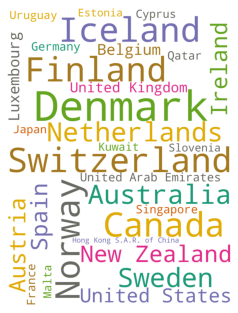

In [207]:
from wordcloud import WordCloud, STOPWORDS
firstcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='white',
                        width=3000,
                        height=4000
                         ).generate_from_frequencies(countries_cluster_1)
plt.imshow(firstcloud)
plt.imshow(firstcloud.recolor( random_state=17), alpha=0.98)
plt.imshow(firstcloud.recolor( colormap= 'Dark2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

In [208]:
final_df[final_df['cluster_id'] == 2]['country'].unique()

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahrain', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Gabon', 'Georgia', 'Greece',
       'Guatemala', 'Guyana', 'Honduras', 'Hungary', 'Indonesia', 'Iraq',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia', 'Malaysia', 'Mauritius', 'Mexico', 'Moldova',
       'Mongolia', 'Montenegro', 'Morocco', 'Nicaragua', 'Oman', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Saudi Arabia', 'Serbia', 'Slovakia', 'Slovenia',
       'South Korea', 'Spain', 'Sri Lanka', 'Suriname', 'Thailand',
       'Trinidad and Tobago', 'Tunisia', 'Turkey'

In [209]:
countries_cluster_2 = final_df[final_df['cluster_id'] == 2].groupby(['country'])['Life Ladder'].mean()

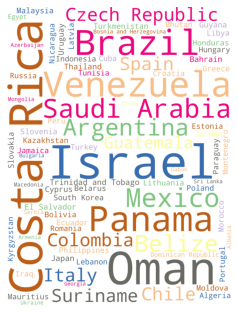

In [210]:
secondcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='white',
                        width=3000,
                        height=4000
                         ).generate_from_frequencies(countries_cluster_2)
plt.imshow(secondcloud)
plt.imshow(secondcloud.recolor( random_state=17), alpha=0.98)
plt.imshow(secondcloud.recolor( colormap= 'Accent' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

In [211]:
final_df[final_df['cluster_id'] == 3]['country'].unique()

array(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Botswana',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Djibouti', 'Egypt',
       'Ethiopia', 'Gabon', 'Georgia', 'Ghana', 'Guinea', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ivory Coast',
       'Kenya', 'Kyrgyzstan', 'Laos', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Morocco', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines',
       'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sri Lanka', 'Sudan', 'Syria', 'Tajikistan',
       'Tanzania', 'Togo', 'Uganda', 'Uzbekistan', 'Vietnam', 'Yemen',
       'Zambia', 'Zimbabwe'], dtype=object)

In [212]:
countries_cluster_3 = final_df[final_df['cluster_id'] == 3].groupby(['country'])['Life Ladder'].mean()

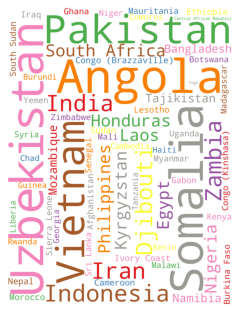

In [213]:
thirdcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='white',
                        width=3000,
                        height=4000
                         ).generate_from_frequencies(countries_cluster_3)
plt.imshow(thirdcloud)
plt.imshow(thirdcloud.recolor( random_state=17), alpha=0.98)
plt.imshow(thirdcloud.recolor( colormap= 'Set1' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

In [214]:
firstcloud.to_file('firstcloud.png')
secondcloud.to_file('secondcloud.png')
thirdcloud.to_file('thirdcloud.png')

## Visualisation of the clusters

In [215]:
colors_clusters = ['SeaGreen', 'Gold', 'Crimson']

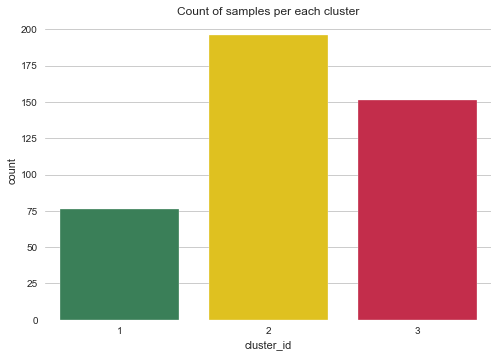

In [218]:
sns.set_style('whitegrid')
clus_count = sns.countplot(x='cluster_id', data=final_df, palette=colors_clusters).set(title='Count of samples per each cluster')

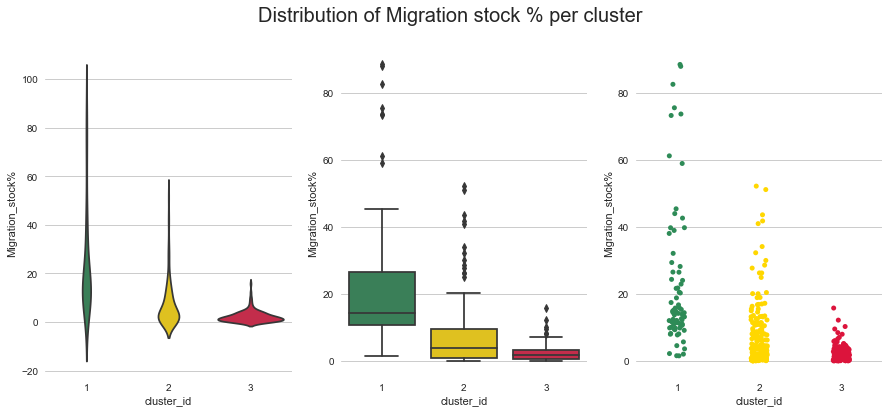

In [219]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Migration_stock%", data=final_df, inner=None, palette=colors_clusters)

plt.subplot(132)
sns.boxplot("cluster_id", "Migration_stock%", data=final_df, palette=colors_clusters)

plt.subplot(133)
sns.stripplot("cluster_id", "Migration_stock%", data=final_df, palette=colors_clusters)

plt.suptitle('Distribution of Migration stock % per cluster', fontsize=20)
plt.show()

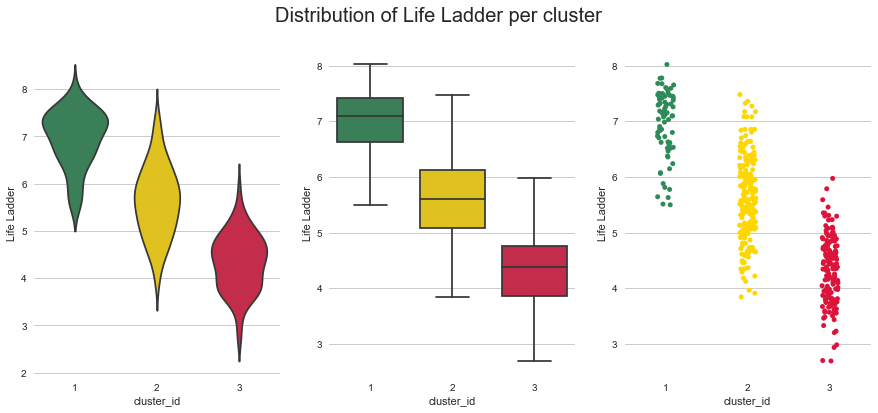

In [220]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Life Ladder", data=final_df, inner=None, palette=colors_clusters)
plt.subplot(132)
sns.boxplot("cluster_id", "Life Ladder", data=final_df, palette=colors_clusters)
plt.subplot(133)
sns.stripplot("cluster_id", "Life Ladder", data=final_df, palette=colors_clusters)
plt.suptitle('Distribution of Life Ladder per cluster', fontsize=20)
plt.show()

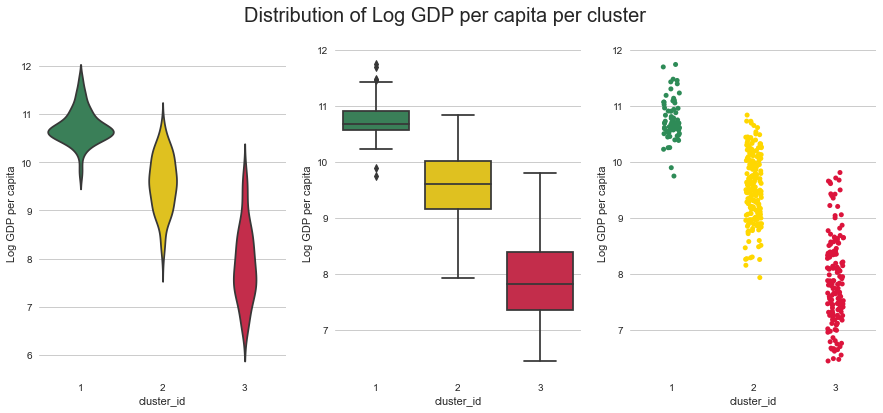

In [221]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Log GDP per capita", data=final_df, inner=None, palette=colors_clusters)
plt.subplot(132)
sns.boxplot("cluster_id", "Log GDP per capita", data=final_df, palette=colors_clusters)
plt.subplot(133)
sns.stripplot("cluster_id", "Log GDP per capita", data=final_df, palette=colors_clusters)
plt.suptitle('Distribution of Log GDP per capita per cluster', fontsize=20)
plt.show()

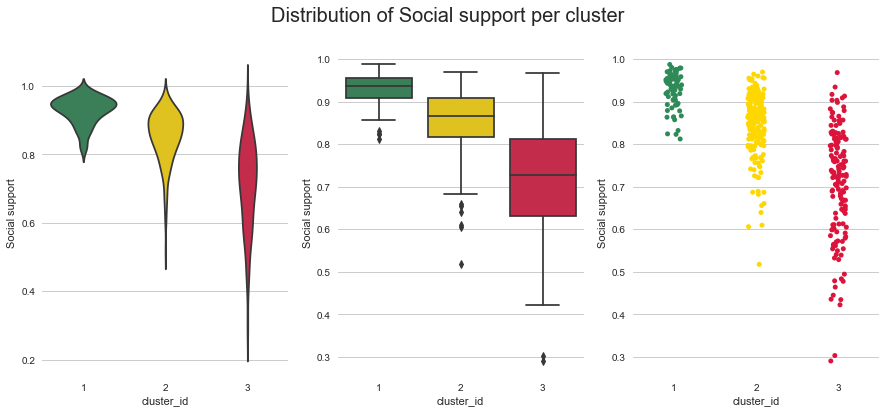

In [222]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Social support", data=final_df, inner=None, palette=colors_clusters)
plt.subplot(132)
sns.boxplot("cluster_id", "Social support", data=final_df, palette=colors_clusters)
plt.subplot(133)
sns.stripplot("cluster_id", "Social support", data=final_df, palette=colors_clusters)
plt.suptitle('Distribution of Social support per cluster', fontsize=20)
plt.show()

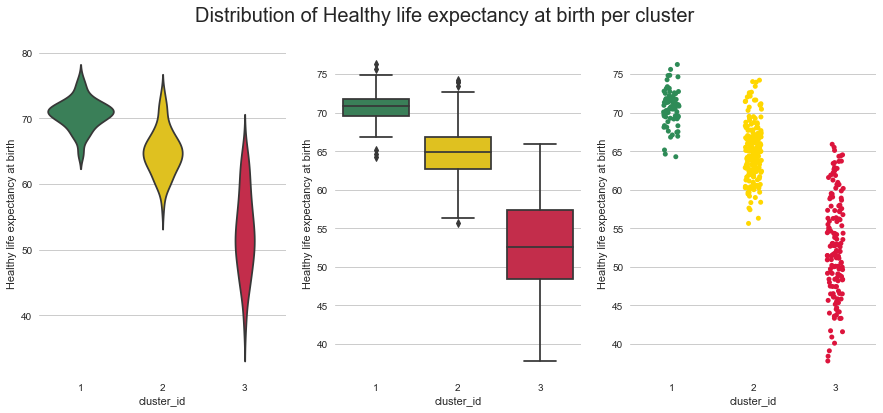

In [223]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Healthy life expectancy at birth", data=final_df, inner=None, palette=colors_clusters)
plt.subplot(132)
sns.boxplot("cluster_id", "Healthy life expectancy at birth", data=final_df, palette=colors_clusters)
plt.subplot(133)
sns.stripplot("cluster_id", "Healthy life expectancy at birth", data=final_df, palette=colors_clusters)
plt.suptitle('Distribution of Healthy life expectancy at birth per cluster', fontsize=20)
plt.show()

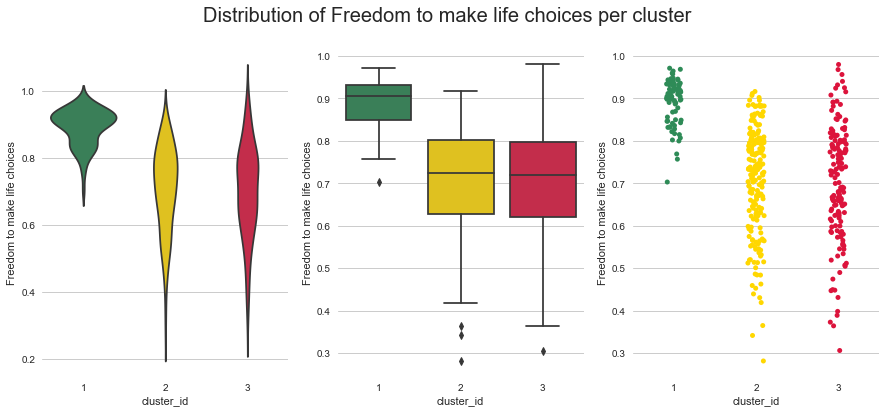

In [224]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Freedom to make life choices", data=final_df, inner=None, palette=colors_clusters)
plt.subplot(132)
sns.boxplot("cluster_id", "Freedom to make life choices", data=final_df, palette=colors_clusters)
plt.subplot(133)
sns.stripplot("cluster_id", "Freedom to make life choices", data=final_df, palette=colors_clusters)
plt.suptitle('Distribution of Freedom to make life choices per cluster', fontsize=20)
plt.show()

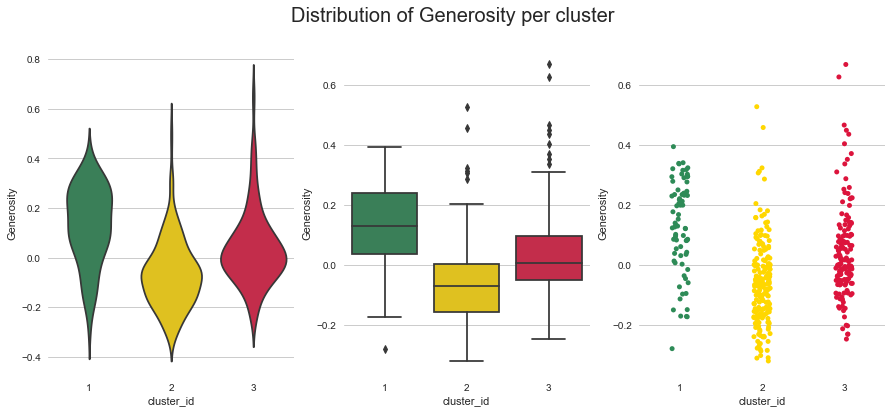

In [225]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Generosity", data=final_df, inner=None, palette=colors_clusters)
plt.subplot(132)
sns.boxplot("cluster_id", "Generosity", data=final_df, palette=colors_clusters)
plt.subplot(133)
sns.stripplot("cluster_id", "Generosity", data=final_df, palette=colors_clusters)
plt.suptitle('Distribution of Generosity per cluster', fontsize=20)
plt.show()

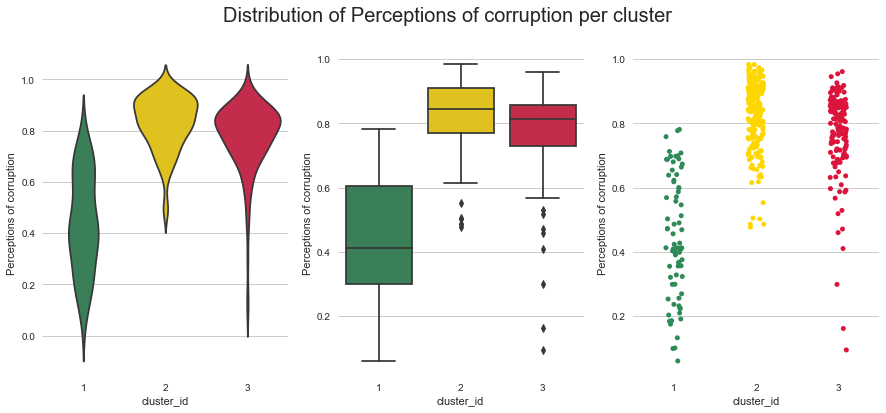

In [226]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Perceptions of corruption", data=final_df, inner=None, palette=colors_clusters)
plt.subplot(132)
sns.boxplot("cluster_id", "Perceptions of corruption", data=final_df, palette=colors_clusters)
plt.subplot(133)
sns.stripplot("cluster_id", "Perceptions of corruption", data=final_df, palette=colors_clusters)
plt.suptitle('Distribution of Perceptions of corruption per cluster', fontsize=20)
plt.show()

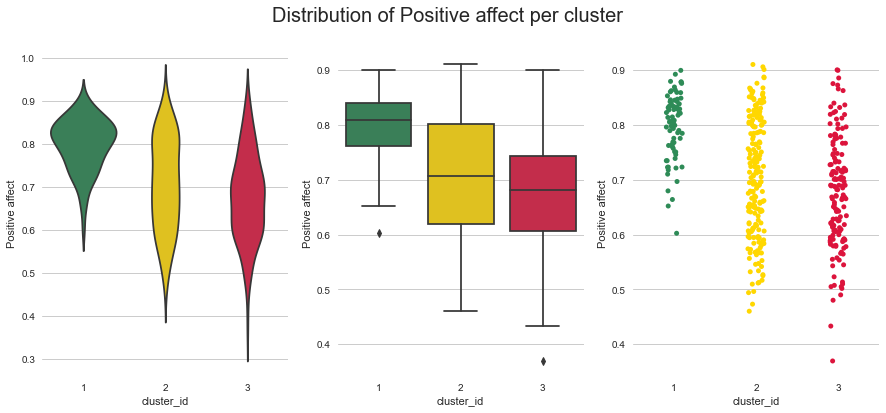

In [227]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Positive affect", data=final_df, inner=None, palette=colors_clusters)
plt.subplot(132)
sns.boxplot("cluster_id", "Positive affect", data=final_df, palette=colors_clusters)
plt.subplot(133)
sns.stripplot("cluster_id", "Positive affect", data=final_df, palette=colors_clusters)
plt.suptitle('Distribution of Positive affect per cluster', fontsize=20)
plt.show()

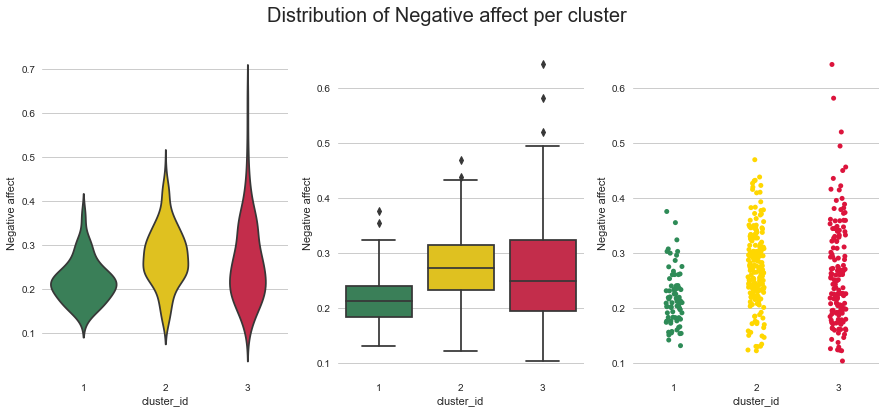

In [228]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Negative affect", data=final_df, inner=None, palette=colors_clusters)
plt.subplot(132)
sns.boxplot("cluster_id", "Negative affect", data=final_df, palette=colors_clusters)
plt.subplot(133)
sns.stripplot("cluster_id", "Negative affect", data=final_df, palette=colors_clusters)
plt.suptitle('Distribution of Negative affect per cluster', fontsize=20)
plt.show()

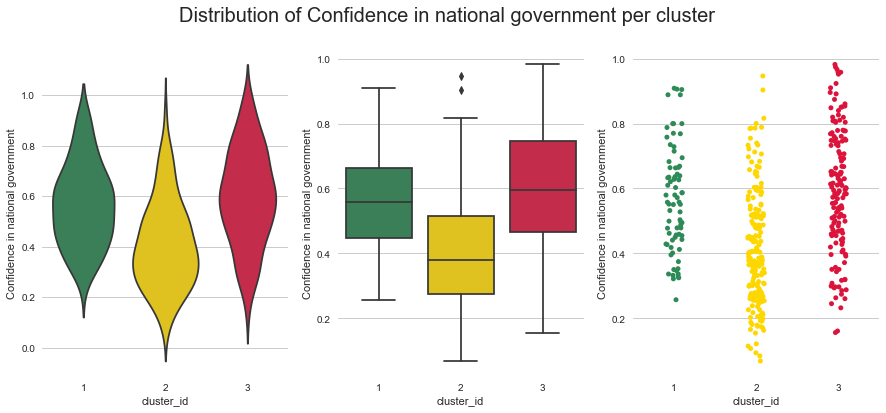

In [229]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Confidence in national government", data=final_df, inner=None, palette=colors_clusters)
plt.subplot(132)
sns.boxplot("cluster_id", "Confidence in national government", data=final_df, palette=colors_clusters)
plt.subplot(133)
sns.stripplot("cluster_id", "Confidence in national government", data=final_df, palette=colors_clusters)
plt.suptitle('Distribution of Confidence in national government per cluster', fontsize=20)
plt.show()

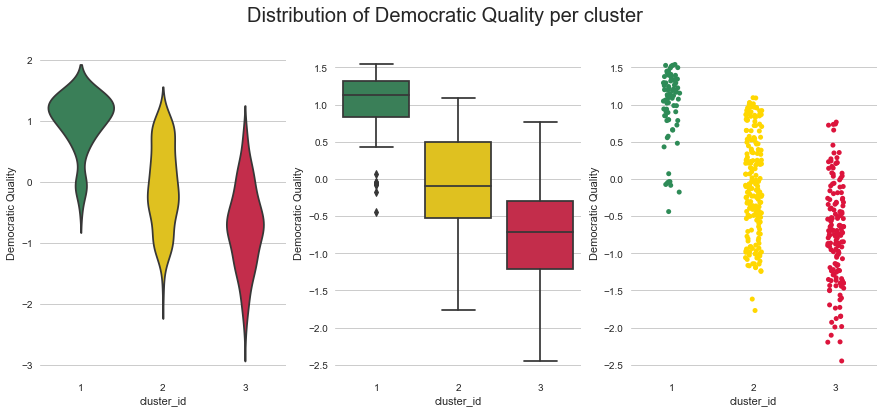

In [230]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Democratic Quality", data=final_df, inner=None, palette=colors_clusters)
plt.subplot(132)
sns.boxplot("cluster_id", "Democratic Quality", data=final_df, palette=colors_clusters)
plt.subplot(133)
sns.stripplot("cluster_id", "Democratic Quality", data=final_df, palette=colors_clusters)
plt.suptitle('Distribution of Democratic Quality per cluster', fontsize=20)
plt.show()

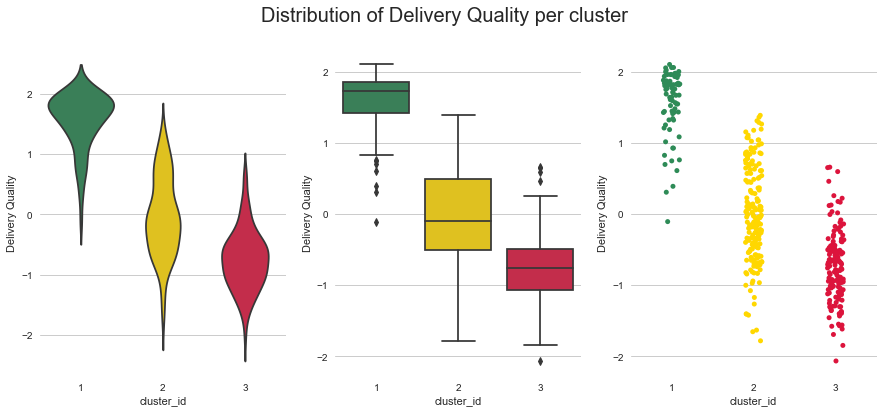

In [231]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.violinplot("cluster_id", "Delivery Quality", data=final_df, inner=None, palette=colors_clusters)
plt.subplot(132)
sns.boxplot("cluster_id", "Delivery Quality", data=final_df, palette=colors_clusters)
plt.subplot(133)
sns.stripplot("cluster_id", "Delivery Quality", data=final_df, palette=colors_clusters)
plt.suptitle('Distribution of Delivery Quality per cluster', fontsize=20)
plt.show()

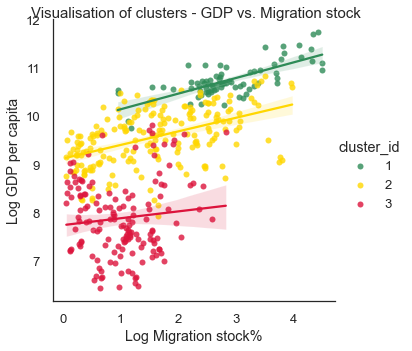

In [232]:
sns.set(font_scale = 1.2)
sns.set_style('white')
sns.lmplot(y='Log GDP per capita', x='Log Migration stock%', data=final_df,
           fit_reg=True, # No regression line
           hue='cluster_id', palette=colors_clusters)
plt.suptitle('Visualisation of clusters - GDP vs. Migration stock', fontsize=15)
plt.show()

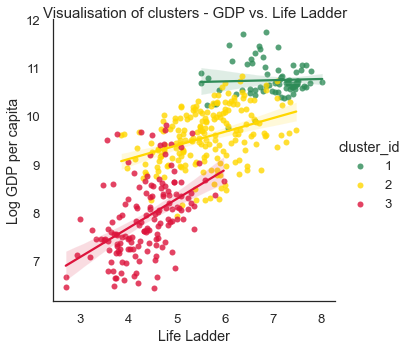

In [233]:
sns.set(font_scale = 1.2)
sns.set_style('white')
sns.lmplot(y='Log GDP per capita', x='Life Ladder', data=final_df,
           fit_reg=True, # No regression line
           hue='cluster_id', palette=colors_clusters)
plt.suptitle('Visualisation of clusters - GDP vs. Life Ladder', fontsize=15)
plt.show()

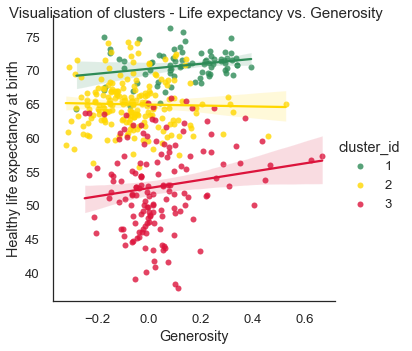

In [234]:
sns.set(font_scale = 1.2)
sns.set_style('white')
sns.lmplot(y='Healthy life expectancy at birth', x='Generosity', data=final_df,
           fit_reg=True, # No regression line
           hue='cluster_id', palette=colors_clusters)
plt.suptitle('Visualisation of clusters - Life expectancy vs. Generosity', fontsize=15)
plt.show()

# **Classification**

## Decission Tree

In [235]:
X = final_df.drop(['Healthy life expectancy at birth', 'Migration_stock%','country', 'cluster_id'], axis = 1)
y = final_df['cluster_id']

In [236]:
X.head()

Life Ladder  Log GDP per capita  Social support  \
0     4.758381            7.386629        0.539075   
1     3.982855            7.466215        0.528597   
2     4.634252            9.077325        0.821372   
3     5.268937            9.203026        0.733152   
4     4.606651            9.303031        0.639356   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.600127    0.137630                   0.706766   
1                      0.388928    0.094686                   0.880638   
2                      0.528605   -0.016183                   0.874700   
3                      0.568958   -0.177533                   0.726262   
4                      0.703851   -0.086883                   0.884793   

   Positive affect  Negative affect  Confidence in national government  \
0         0.618265         0.275324                           0.299357   
1         0.553553         0.339276                           0.260557   
2         0.552678         0.246335                           0.300681   
3         0.647908         0.300060                           0.409726   
4         0.688370         0.350427                           0.506978   

   Democratic Quality  Delivery Quality  \
0           -1.991810         -1.617176   
1           -1.844364         -1.291594   
2           -0.045108         -0.420024   
3           -0.033831         -0.246433   
4            0.251629         -0.152544   

   Standard deviation of ladder by country-year  \
0                                      1.878622   
1                                      2.160618   
2                                      1.764947   
3                                      1.862201   
4                                      2.729001   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.394803   
1                                           0.542480   
2                                           0.380848   
3                                           0.353430   
4                                           0.592405   

   GINI index (World Bank estimate), average 2000-15  \
0                                           0.409100   
1                                           0.428717   
2                                           0.303250   
3                                           0.303250   
4                                           0.303250   

   gini of household income reported in Gallup, by wp5-year  \
0                                           0.327318          
1                                           0.596918          
2                                           0.492998          
3                                           0.543528          
4                                           0.422627          

   Log Migration stock%  Log Healthy life exp  country_code  
0              0.311636              3.932001             0  
1              0.777280              3.964493             0  
2              1.131542              4.213262             1  
3              1.036367              4.225573             1  
4              1.094951              4.244085             1

In [237]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [238]:
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=7)
tree_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [239]:
y_pred_dt = tree_1.predict(X_test)
y_pred_dt[:10]

array([3, 3, 2, 2, 3, 2, 1, 2, 2, 3])

In [240]:
y_pred_train_dt = tree_1.predict(X_train)
y_pred_train_dt[:10]

array([2, 1, 1, 2, 2, 3, 2, 1, 3, 2])

In [241]:
y_train[:10]

140    2
395    1
118    1
114    2
299    2
421    3
141    2
155    1
376    3
311    2
Name: cluster_id, dtype: int32

In [242]:
import sys
sys.path.insert(0, 'C:/Users/Alicja/Desktop/Data Science/_functions_')

from fx_MLClassification import *

In [243]:
C_Allmetrics(tree_1, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[ 47   0   0]
 [  0 145   0]
 [  0   0 104]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[24  4  1]
 [ 0 45  6]
 [ 0  5 42]]
 Classification report 
    precision    recall  f1-score  support
1   1.000000  0.827586  0.905660     29.0
2   0.833333  0.882353  0.857143     51.0
3   0.857143  0.893617  0.875000     47.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.891839   0.903731  0.881530  0.882368
test   0.874016   0.896825  0.867852  0.879268


Accuracy  Precision    Recall        f1
Train  0.891839   0.903731  0.881530  0.882368
test   0.874016   0.896825  0.867852  0.879268

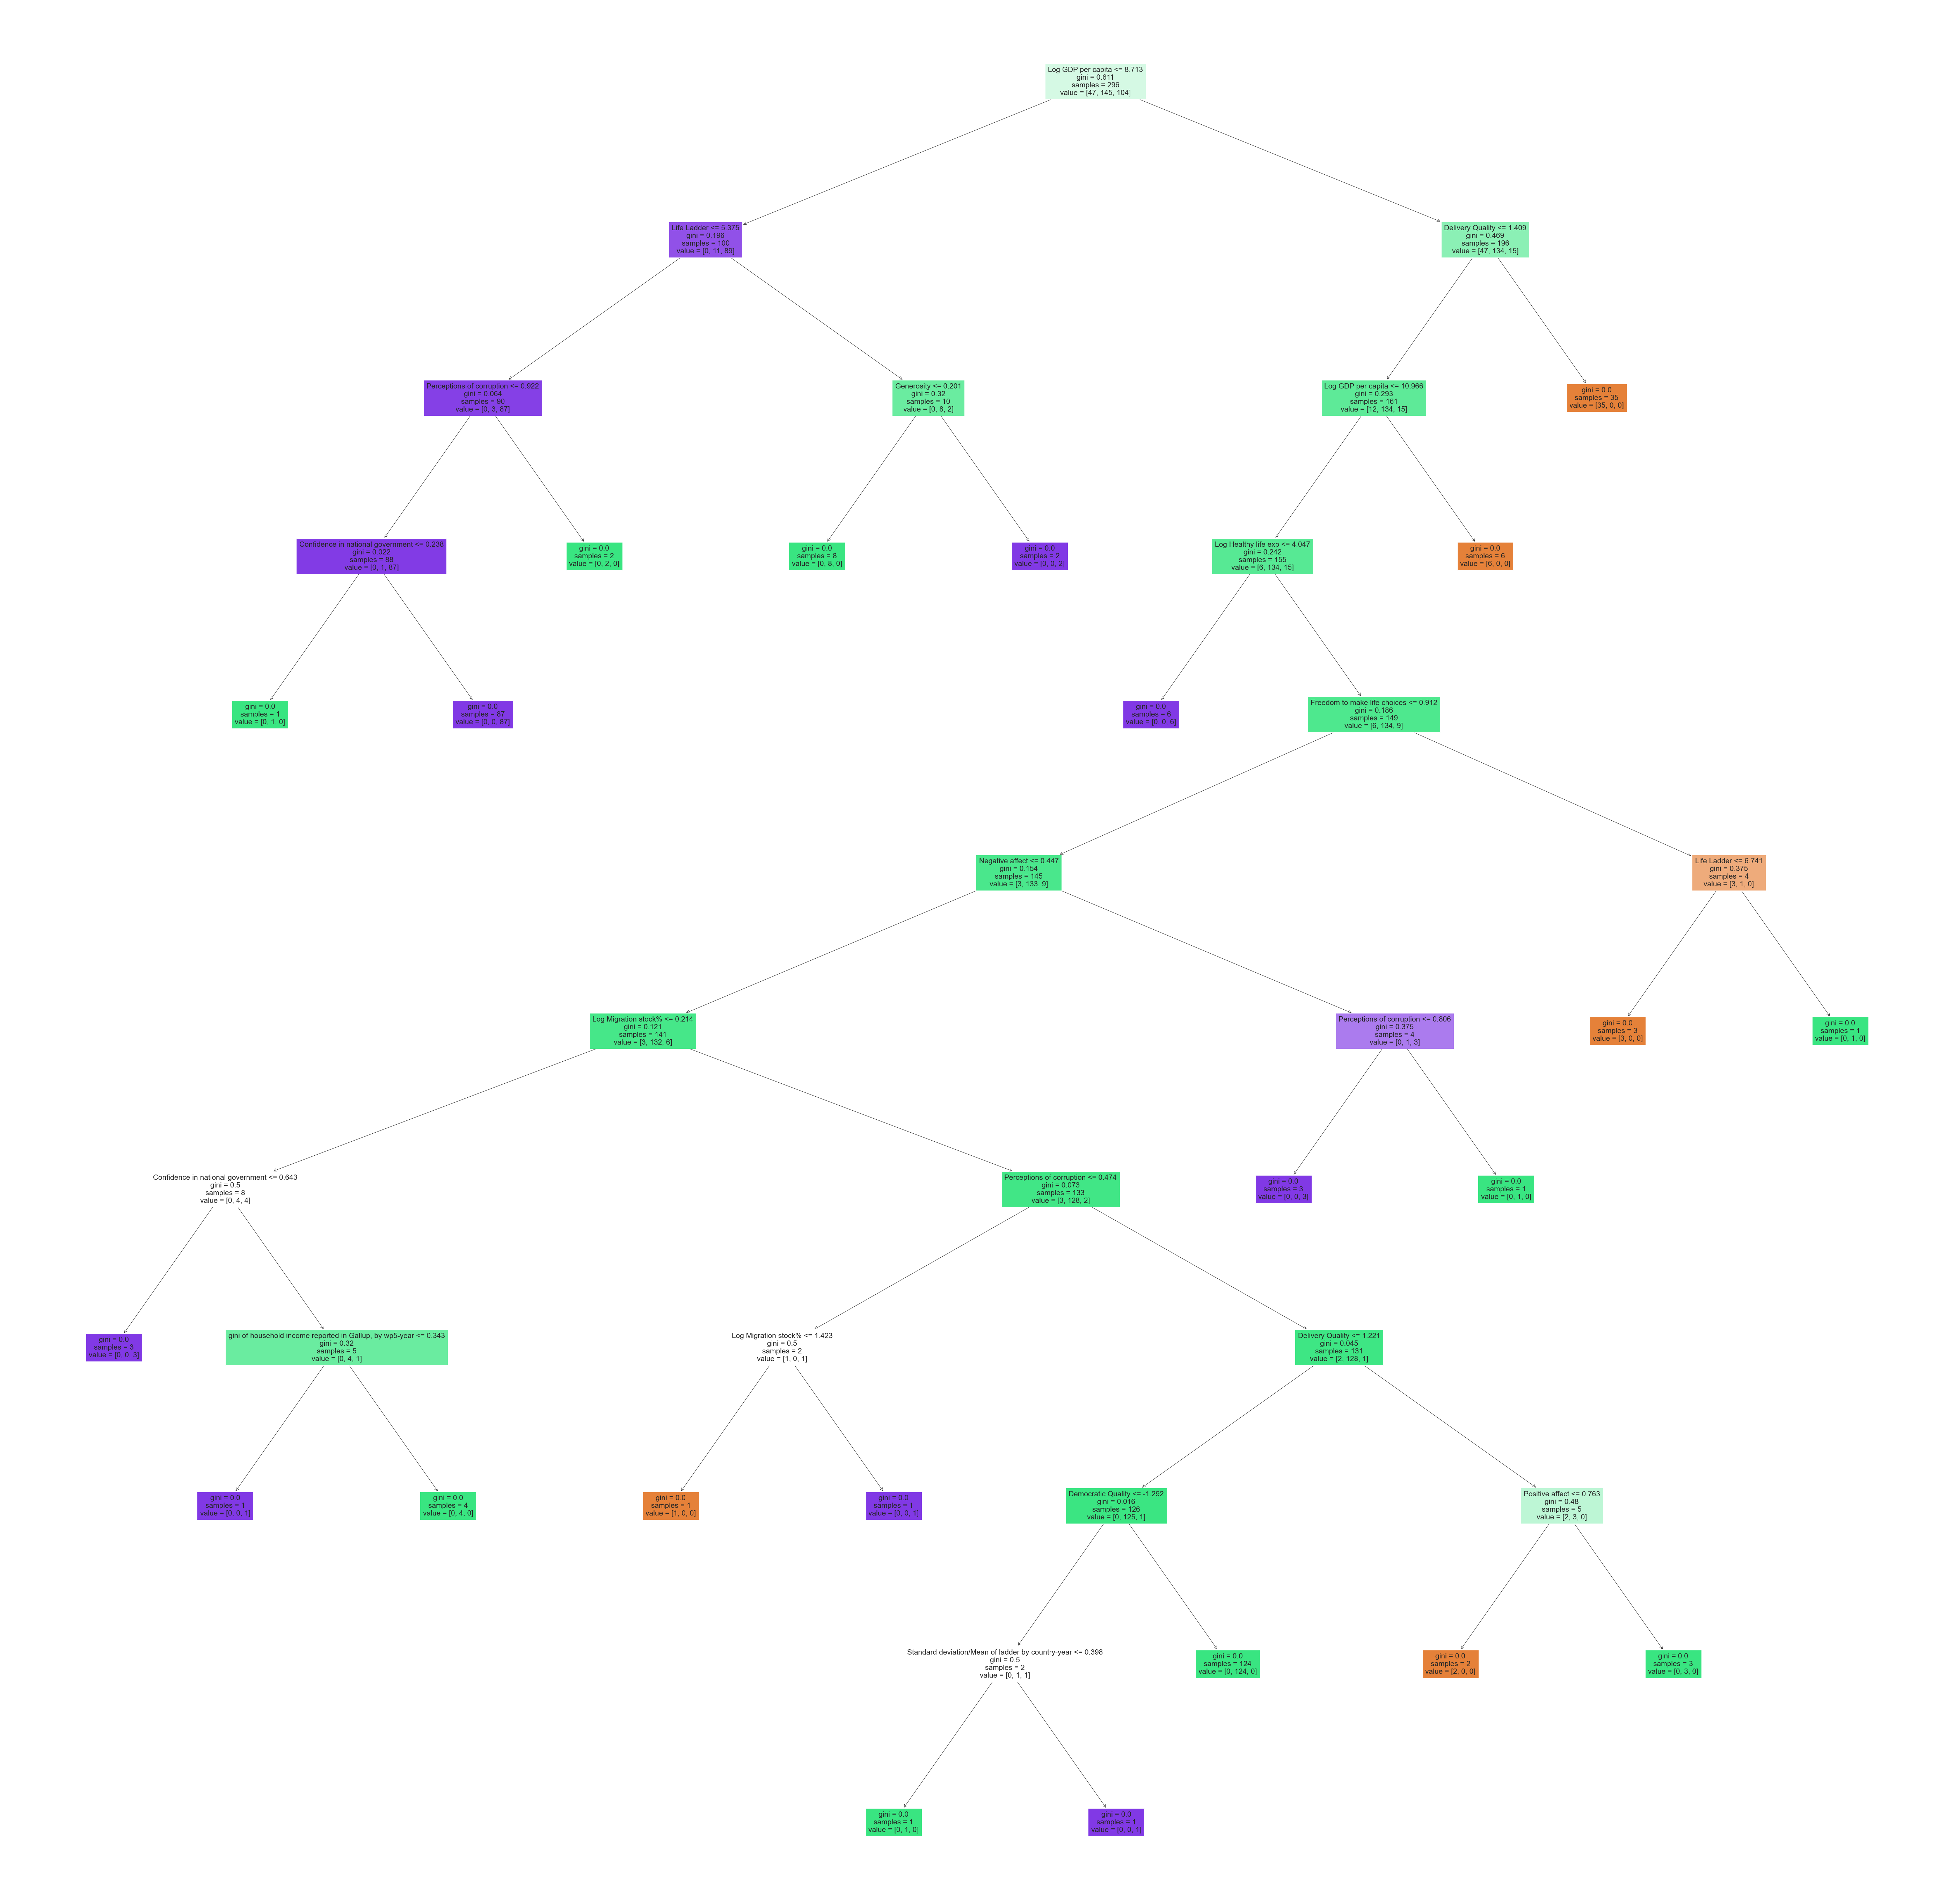

In [244]:
fig = plt.figure(figsize=(100,100))

from sklearn import tree

tree.plot_tree(tree_1, feature_names = X_train.columns, 
             filled=True);

## Random Forest

In [245]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100, random_state=7)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

In [246]:
y_pred_RF = rand_forest.predict(X_test)

print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        29
           2       0.94      0.94      0.94        51
           3       0.94      1.00      0.97        47

    accuracy                           0.95       127
   macro avg       0.96      0.95      0.95       127
weighted avg       0.95      0.95      0.95       127



In [247]:
C_Allmetrics(rand_forest, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[ 47   0   0]
 [  0 145   0]
 [  0   0 104]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[26  3  0]
 [ 0 48  3]
 [ 0  0 47]]
 Classification report 
    precision    recall  f1-score  support
1   1.000000  0.896552  0.945455     29.0
2   0.941176  0.941176  0.941176     51.0
3   0.940000  1.000000  0.969072     47.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.946092   0.966750  0.925844  0.937529
test   0.952756   0.960392  0.945909  0.951901


Accuracy  Precision    Recall        f1
Train  0.946092   0.966750  0.925844  0.937529
test   0.952756   0.960392  0.945909  0.951901

### Randomized Search Cross Validation

In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = list(range(200,2000,200))

max_depth = list(range(10,110,10))

min_samples_split = [2, 5, 10]

In [249]:
random_grid = {'n_estimators':n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_split': [2, 5, 10]}

In [250]:
rf_random = RandomizedSearchCV(estimator=rand_forest, 
                               param_distributions=random_grid, 
                               n_iter=100,cv=3, verbose=1,
                               random_state=42, n_jobs=-1)

In [251]:
%%time
rand_forest = RandomForestClassifier(random_state=42)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: total: 9 s
Wall time: 3min 53s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=7),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=1)

In [252]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=50, n_estimators=1800, random_state=7)

In [253]:
rand_forest = RandomForestClassifier(max_depth=50,
                       n_estimators=1800, random_state=7)

rand_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=1800, random_state=7)

In [254]:
C_Allmetrics(rand_forest, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[ 47   0   0]
 [  0 145   0]
 [  0   0 104]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[25  4  0]
 [ 0 50  1]
 [ 0  0 47]]
 Classification report 
    precision    recall  f1-score  support
1   1.000000  0.862069  0.925926     29.0
2   0.925926  0.980392  0.952381     51.0
3   0.979167  1.000000  0.989474     47.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train   0.94954   0.959839  0.929986  0.938853
test    0.96063   0.968364  0.947487  0.955927


Accuracy  Precision    Recall        f1
Train   0.94954   0.959839  0.929986  0.938853
test    0.96063   0.968364  0.947487  0.955927